Ilona Smith - 2471308\
Luca von Mayer - 2427051\
Tumi Jourdan - 2180153\
Tao Yuan - 2332155

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('logbook_assignment1.csv', low_memory=False)


## Question 1


In [3]:
# 1.1.1
# determine what are not propper dates
# Improper formatting/garbage
# Propper date is month/day/year
# Note this only works if we clean up the stuff df["date_feuled"] = pd.to_datetime(df["date_feuled"], format='%b %d %Y', errors='raise')

# Define a function to check if the date is valid
def is_valid_date(date_str):
    if pd.isna(date_str):
        return False
    try:
        pd.to_datetime(date_str, format='%b %d %Y', errors='raise')
        return True
        
    except (ValueError, TypeError):
        return False

# Apply the function to the 'date_fueled' column
# Creating a new column valid_date_feuled (this is the data set in memory not the actual csv file)
# this column is a binary column into trues and false

df['valid_date_fueled'] = df['date_fueled'].apply(is_valid_date)

invalid_date_percentage = (df['valid_date_fueled'].value_counts(normalize=True) * 100)[False]

print(f"Percentage of invalid 'date_fueled' entries: {invalid_date_percentage:.2f}%")


Percentage of invalid 'date_fueled' entries: 11.68%


In [4]:
# 1.1.2
# proxy dates
df['date_fueled'] = df.apply(lambda row: row['date_captured'] if not is_valid_date(row['date_fueled']) and is_valid_date(row['date_captured']) else row['date_fueled'], axis=1)
df.head(11)


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,Oct 23 2021,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,Nov 20 2021,Dec 12 2021,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,Jan 20 2022,Jan 20 2022,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,Apr 16 2018,Apr 16 2018,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,Nov 29 2020,Nov 29 2020,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [5]:
#1.1.3
# date formats and fixing the invalids
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')

print(df.dtypes)
df.head(11)

date_fueled          datetime64[ns]
date_captured        datetime64[ns]
odometer                     object
gallons                      object
cost_per_gallon              object
total_spent                  object
mpg                          object
miles                        object
user_url                     object
valid_date_fueled              bool
dtype: object


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [6]:
#1.1.4
# Removing the dates that are too old or in the ethereal future

df['date_fueled'] = df.apply(lambda row: pd.NaT if (row['date_fueled'].year < 2005 or row['date_fueled']>pd.Timestamp.now()) else row['date_fueled'], axis=1)
df['date_captured'] = df.apply(lambda row: pd.NaT if (row['date_captured'].year < 2005 or row['date_captured']>pd.Timestamp.now()) else row['date_captured'], axis=1)

df.head()


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True


C:\Users\Tumi\AppData\Local\Temp\ipykernel_5080\4059934696.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_graphing, x='year', palette='Reds')


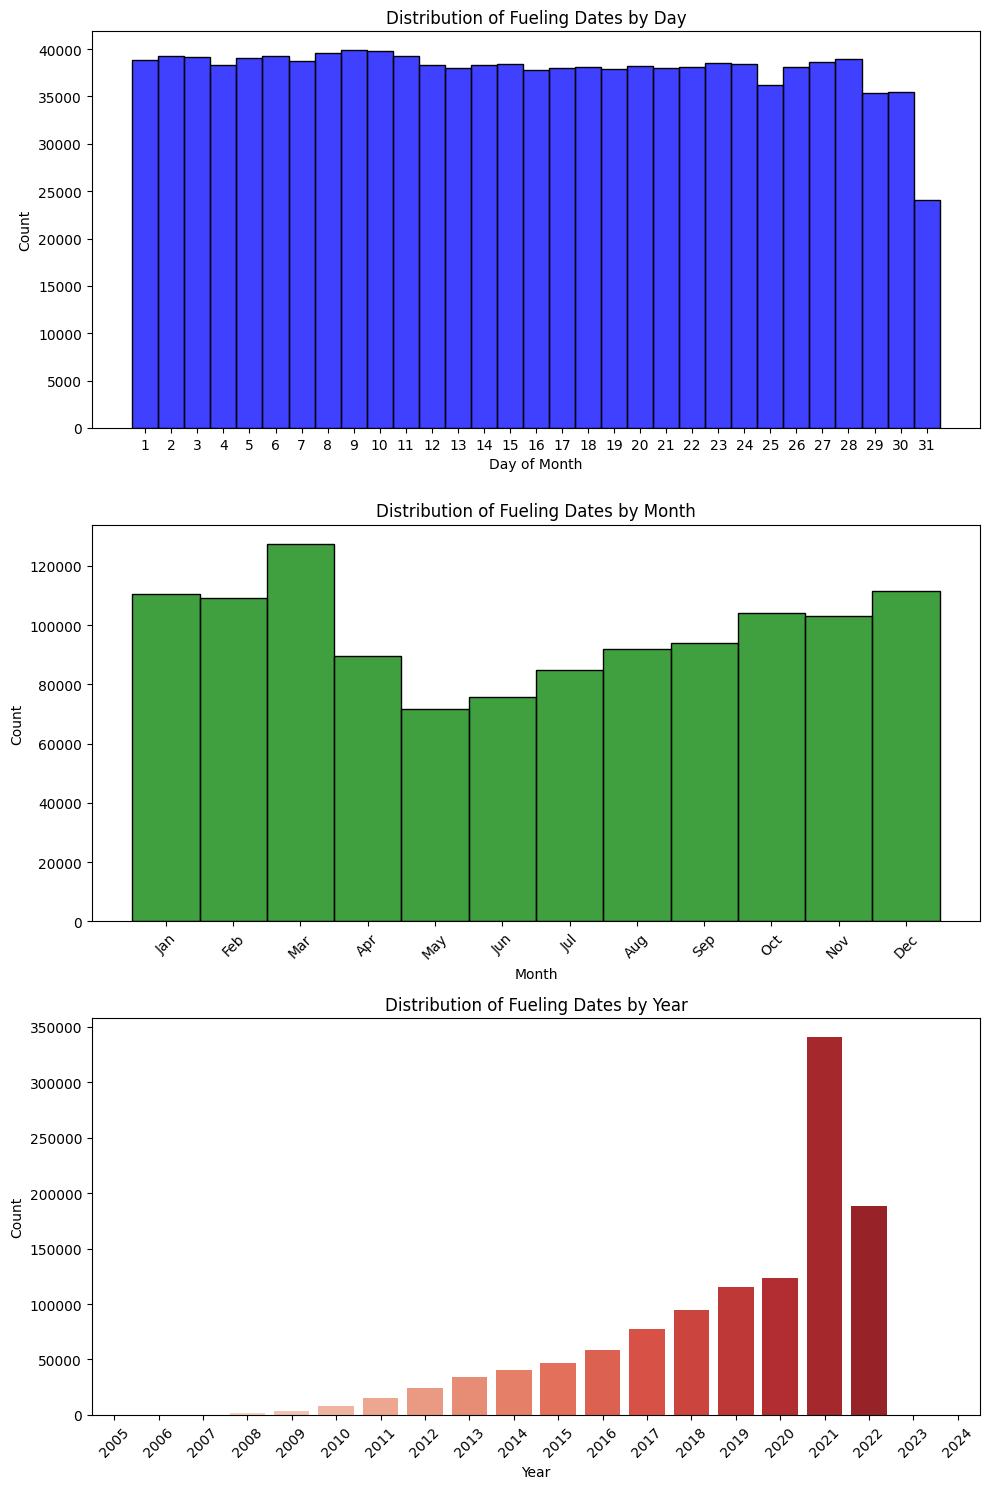

In [7]:
#1.1.5

# Plotting the dates of fueling

# Date time form
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# drop rows 
df_graphing = df.copy()
df_graphing = df_graphing.dropna(subset=['date_fueled'])
df_graphing['day'] = df_graphing['date_fueled'].dt.day
df_graphing['month'] = df_graphing['date_fueled'].dt.month
df_graphing['year'] = df_graphing['date_fueled'].dt.year

# plot the results

plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
sns.histplot(df_graphing['day'], bins=31, discrete=True, kde=False, color='blue')
plt.title('Distribution of Fueling Dates by Day')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.xticks(range(1, 32))  # Set x-ticks to show all days of the month

plt.subplot(3, 1, 2)
sns.histplot(df_graphing['month'], bins=12, discrete=True, kde=False, color='green')
plt.title('Distribution of Fueling Dates by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.subplot(3, 1, 3)
sns.countplot(data=df_graphing, x='year', palette='Reds')
plt.title('Distribution of Fueling Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
#1.2.1
# Identifying the percentage of missing gallons miles and odometer

missing_gallons = df['gallons'].isna().mean() * 100
missing_miles = df['miles'].isna().mean() * 100
missing_odometer = df['odometer'].isna().mean() * 100

# Print out the percentages
print(f"Percentage of missing values in 'gallons': {missing_gallons:.2f}%")
print(f"Percentage of missing values in 'miles': {missing_miles:.2f}%")
print(f"Percentage of missing values in 'odometer': {missing_odometer:.2f}%")


Percentage of missing values in 'gallons': 6.32%
Percentage of missing values in 'miles': 87.55%
Percentage of missing values in 'odometer': 12.70%


In [9]:
#1.2.3
# Conversion to float
def to_float(x):
    try:
        # Remove any non-numeric characters (except for the decimal point)
        cleaned = x.replace(',', '')
        return float(cleaned)
    except:
        return None  # Return None if conversion fail
    
df['miles'] = df['miles'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['odometer'] = df['odometer'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['gallons'] = df['gallons'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


df.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [10]:
#1.2.2

# calculate missing values
df['mpg'] = df['mpg'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


def fix_measurements(row):
    if(pd.isna(row['gallons'])):
        
        row['gallons'] = (1/row['mpg']) * row['miles']
        
    if(pd.isna(row['miles'])):
        
        row['miles'] = row['mpg']*row['gallons']
        
    if(pd.isna(row['mpg'])):
        
        row['mpg'] = row['miles']/ row['gallons']
    return row
            
df = df.apply(lambda row: fix_measurements(row),  axis=1)

df.head(100)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True
...,...,...,...,...,...,...,...,...,...,...
95,2014-05-14,2014-05-14,NaN,12.622,£5.03,£63.50,25.2,318.6000,https://www.somewebsite.com/alfa_romeo/155/199...,False
96,2022-01-24,2022-01-24,NaN,13.181,$3.579,$47.17,10.8,142.1000,https://www.somewebsite.com/mazda/rx-7/1990/11...,True
97,2022-02-14,2022-02-14,26753.0,17.370,$3.339,$58.00,15.9,276.1830,https://www.somewebsite.com/volvo/xc90/2019/94...,True
98,2022-04-05,2022-04-05,78429.0,10.567,R73.85,R780.40,0.0,0.0000,https://www.somewebsite.com/ford/transit_conne...,True


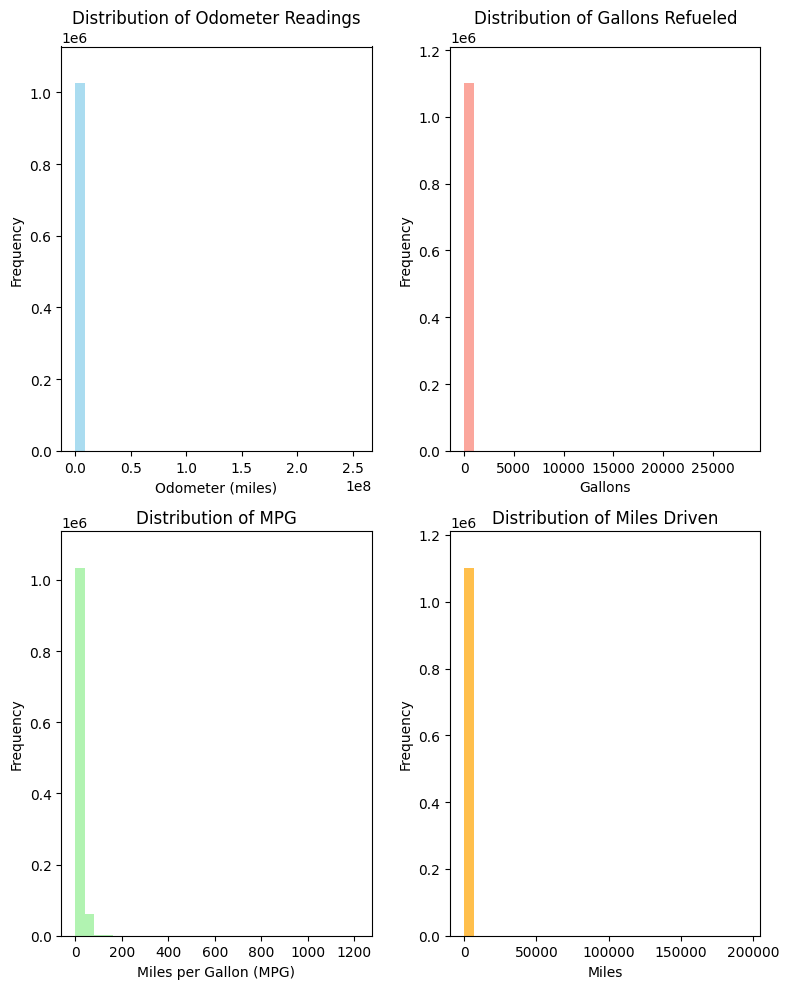

In [11]:
# 1.2.4
# Plotting distro of numeric fields
# Set up the plotting environment
plt.figure(figsize=(8, 10))

df_temp = df.copy()

# Plot distribution for 'odometer', ignoring 0 values
plt.subplot(2, 2, 1)
filtered_odometer = df_temp['odometer'].dropna()

n, bins, patches = plt.hist(filtered_odometer, bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)

plt.subplot(2, 2, 2)
filtered_gallons = df_temp['gallons'].dropna()
n, bins, patches = plt.hist(filtered_gallons, bins=30, color='salmon', alpha=0.7)
plt.title('Distribution of Gallons Refueled')
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)

plt.subplot(2, 2, 3)
filtered_mpg = df_temp['mpg'].dropna()
n, bins, patches = plt.hist(filtered_mpg, bins=30, color='lightgreen', alpha=0.7)
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)

plt.subplot(2, 2, 4)
filtered_miles = df_temp['miles'].dropna()
n, bins, patches = plt.hist(filtered_miles, bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)

# Adjust layout for better fit
plt.tight_layout()
plt.show()

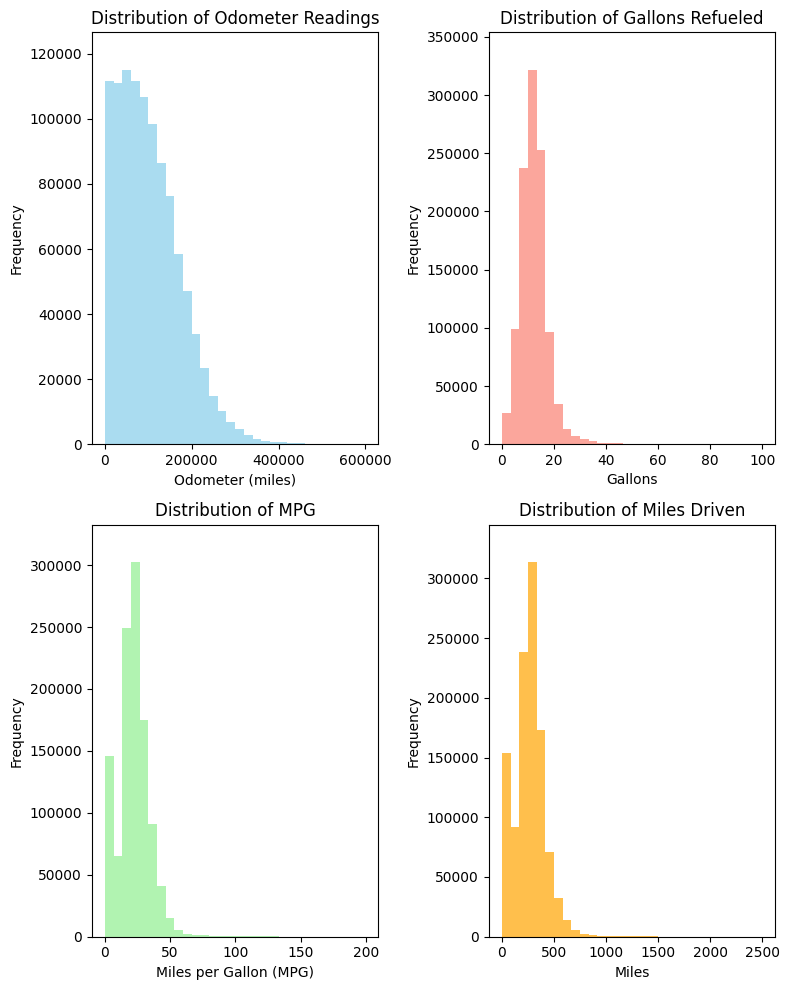

In [12]:
# 1.2.4* showing without outliers making data unreadable
# NOTE These graphs are to see the distrobutions without the lobsiding of the outliers
plt.figure(figsize=(8, 10))

df_temp = df.copy()

plt.subplot(2, 2, 1)
filtered_odometer = df_temp['odometer'].dropna().astype(float)
filtered_odometer = filtered_odometer[filtered_odometer < 600000]
n, bins, patches = plt.hist(filtered_odometer, bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  

plt.subplot(2, 2, 2)
filtered_gallons = df_temp['gallons'].dropna().astype(float)
filtered_gallons = filtered_gallons[filtered_gallons < 100]
n, bins, patches = plt.hist(filtered_gallons, bins=30, color='salmon', alpha=0.7)
plt.title('Distribution of Gallons Refueled')
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)

plt.subplot(2, 2, 3)
filtered_mpg = df_temp['mpg'].dropna().astype(float)
filtered_mpg = filtered_mpg[filtered_mpg < 200]
n, bins, patches = plt.hist(filtered_mpg, bins=30, color='lightgreen', alpha=0.7)
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1) 

plt.subplot(2, 2, 4)
filtered_miles = df_temp['miles'].dropna().astype(float)
filtered_miles = filtered_miles[filtered_miles < 2500]
n, bins, patches = plt.hist(filtered_miles, bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)

plt.tight_layout()
plt.show()

In [13]:
#1.2.5

# Compute descriptive statistics
statistics = pd.DataFrame()

for column in ['odometer', 'gallons', 'mpg', 'miles']:
    stats = df[column].describe()
    mode = df[column].mode()[0]  # Get the most frequent value
    statistics[column] = pd.Series({
        'mean': stats['mean'],
        'std': stats['std'],
        'min': stats['min'],
        '25%': stats['25%'],
        '50%': stats['50%'],
        '75%': stats['75%'],
        'max': stats['max'],
        'most_frequent': mode
    })

print(statistics)

                   odometer       gallons          mpg          miles
mean           1.039960e+05     12.801068    22.163322     269.489628
std            3.405252e+05     74.472096    15.743052     725.709249
min            0.000000e+00      0.000000     0.000000       0.000000
25%            4.592000e+04      8.990000    15.600000     181.400000
50%            9.188200e+04     11.954000    21.800000     267.058000
75%            1.469220e+05     14.939000    28.500000     342.769250
max            2.543621e+08  28380.000000  1214.300000  195321.200000
most_frequent  1.000000e+00     10.567000     0.000000       0.000000


## Question 2


In [14]:
#2.1 currency column
def get_symbol_value(price):
    if isinstance(price, str):
        pattern =  r'(\D*)[\d\,\.]+(\D*)'
        unit = re.match(pattern, price.strip()).groups()
        numeric_value = re.findall(r'[\d\,\.]+', price.strip())[0]
        return (unit[0] or unit[1]).strip(), numeric_value.lstrip('.')
    return pd.NA, 0.0

df['currency'] = df['total_spent'].apply(lambda row: get_symbol_value(row)[0])

In [15]:
#2.2 float value total spend and cost per gallon
df['total_spent_float'] = df['total_spent'].apply(lambda row: get_symbol_value(row)[1])
df['total_spent_float'] = df['total_spent_float'].apply(lambda x: to_float(x) if isinstance(x, str) else x)

df['cost_per_gallon_float'] = df['cost_per_gallon'].apply(lambda row: get_symbol_value(row)[1])
df['cost_per_gallon_float'] = df['cost_per_gallon_float'].apply(lambda x: to_float(x) if isinstance(x, str) else x)

In [16]:
#2.3 car make, model, year, user id
def get_user_info(url):
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)/(\d+)/(\d+)'
    match = re.match(pattern, url.strip())
    if match:
        return match.groups()
    
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)/(\d+)'
    match = re.match(pattern, url.strip())
    if match:
        if len(match[2]) == 4:
            return match.group(1), match.group(2), match.group(3), pd.NA
        else:
            return match.group(1), match.group(2), pd.NA, match.group(3)
    
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)'
    match = re.match(pattern, url.strip())
    if match:
        return match.group(1), match.group(2), pd.NA, pd.NA

df[['car_make', 'model', 'year', 'user_id']] = pd.DataFrame(df['user_url'].apply(get_user_info).tolist(), index=df.index)

In [17]:
#part 2 q2
#litres filled - using UK gallons
def to_litre(x):
    try:
        return float(x) * 4.54609
    except (ValueError, TypeError):
        return 0.0

df['litres_filled'] = df['gallons'].apply(to_litre)

In [18]:
#km driven
def to_km(x):
    try:
        return float(x) * 1.60934
    except(ValueError, TypeError):
        return 0.0

df['km_driven'] = df['miles'].apply(to_km)

In [19]:
#litres per 100km
df['litres_per_100km'] = df.apply(lambda row: (row['litres_filled'] / row['km_driven']) * 100 if row['km_driven'] != 0 else 0.0, axis=1)

print(df[['litres_filled', 'km_driven', 'litres_per_100km']])

         litres_filled   km_driven  litres_per_100km
0                  NaN         NaN               NaN
1            55.098611  616.364345          8.939292
2            36.327805  366.516724          9.911636
3            48.074902  796.478459          6.035932
4            52.966495  393.322696         13.466422
...                ...         ...               ...
1174865      59.308290  539.583056         10.991503
1174866      57.448939  406.744592         14.124082
1174867      45.469992  458.753632          9.911636
1174868      47.702122  616.368369          7.739223
1174869      78.874662    0.000000          0.000000

[1174870 rows x 3 columns]


## Question 3


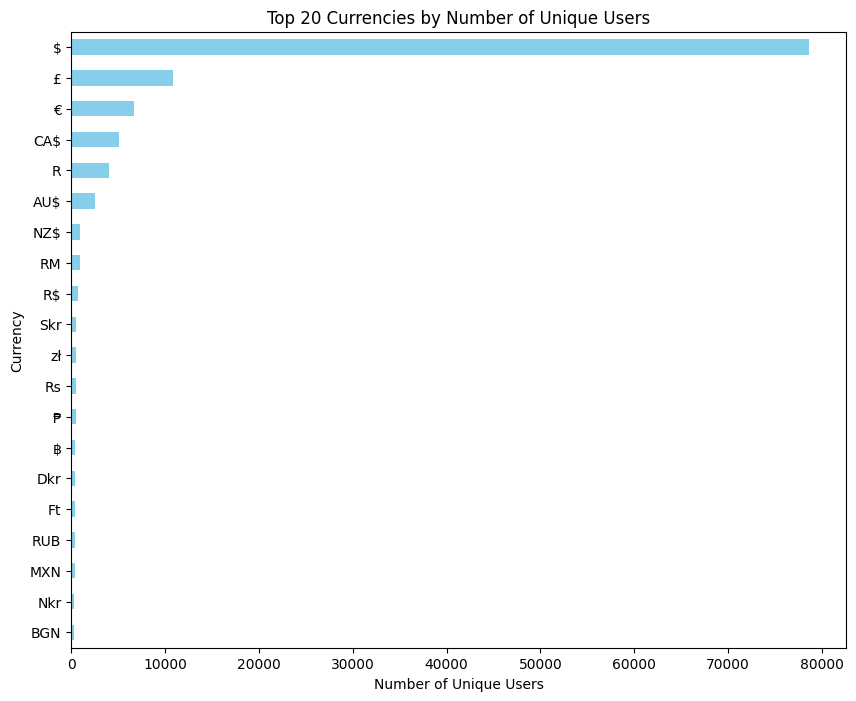

In [20]:
#Q3.1
# currency by unique users
df_temp = df.copy()
# Remove NaN values from the 'currency' column (surprisingly a lot of nans)

unique_users_per_currency = df_temp.groupby('currency')['user_id'].nunique()
unique_users_per_currency = unique_users_per_currency.sort_values(ascending=False)
top_currencies = unique_users_per_currency.head(20)

top_currencies.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 20 Currencies by Number of Unique Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('Currency')
plt.gca().invert_yaxis()
plt.show()

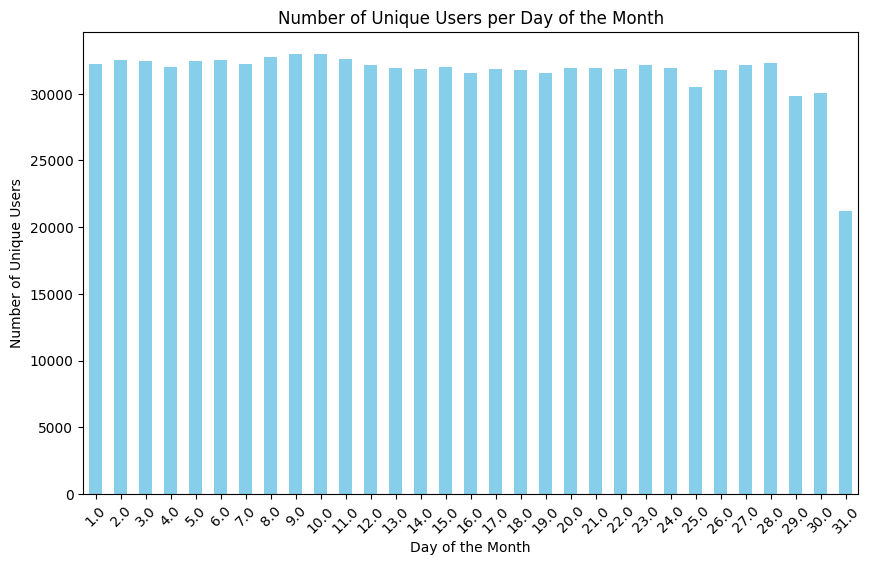

In [21]:
#3.2 users per day of month

df['day_of_month'] = df['date_fueled'].dt.day

unique_users_per_day = df.groupby('day_of_month')['user_id'].nunique()

unique_users_per_day = unique_users_per_day.sort_index()

unique_users_per_day.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Unique Users per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.show()

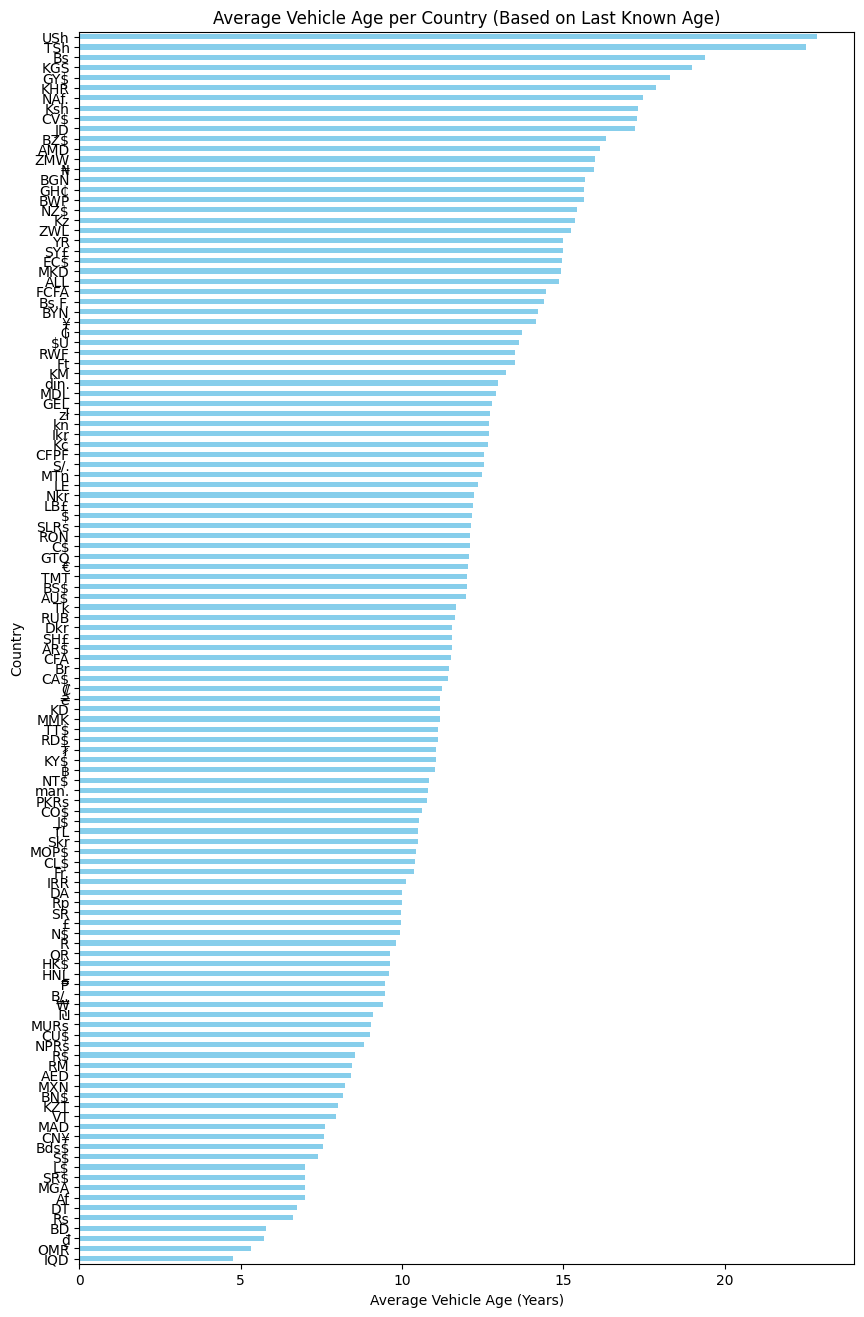

In [22]:
#3.3 Average vehicle age
df_temp = df.copy()

df_filtered = df_temp.dropna(subset=['user_id', 'date_fueled'])

df_latest_age = df_filtered.loc[df_filtered.groupby('user_id')['date_fueled'].idxmax()]
vehicle_age_mapping = df_latest_age.set_index('user_id')['date_fueled']
df_temp['vehicle_age'] = df_temp['user_id'].map(vehicle_age_mapping)
df_temp['vehicle_age'] = df_temp['vehicle_age'].dt.year

# Convert 'year' to datetime
df_temp['year'] = pd.to_numeric(df_temp['year'])
df_temp['vehicle_age'] = df_temp['vehicle_age'] - df_temp['year']
df_filtered = df_temp.dropna(subset=['currency', 'vehicle_age'])

average_age_per_country = df_filtered.groupby('currency')['vehicle_age'].mean().sort_values()
df['vehicle_age'] = df_temp['vehicle_age']
# Step 3: Plot the average vehicle age per country
plt.figure(figsize=(10, 16))
average_age_per_country.plot(kind='barh', color='skyblue')
plt.title('Average Vehicle Age per Country (Based on Last Known Age)')
plt.xlabel('Average Vehicle Age (Years)')
plt.ylabel('Country')
plt.show()

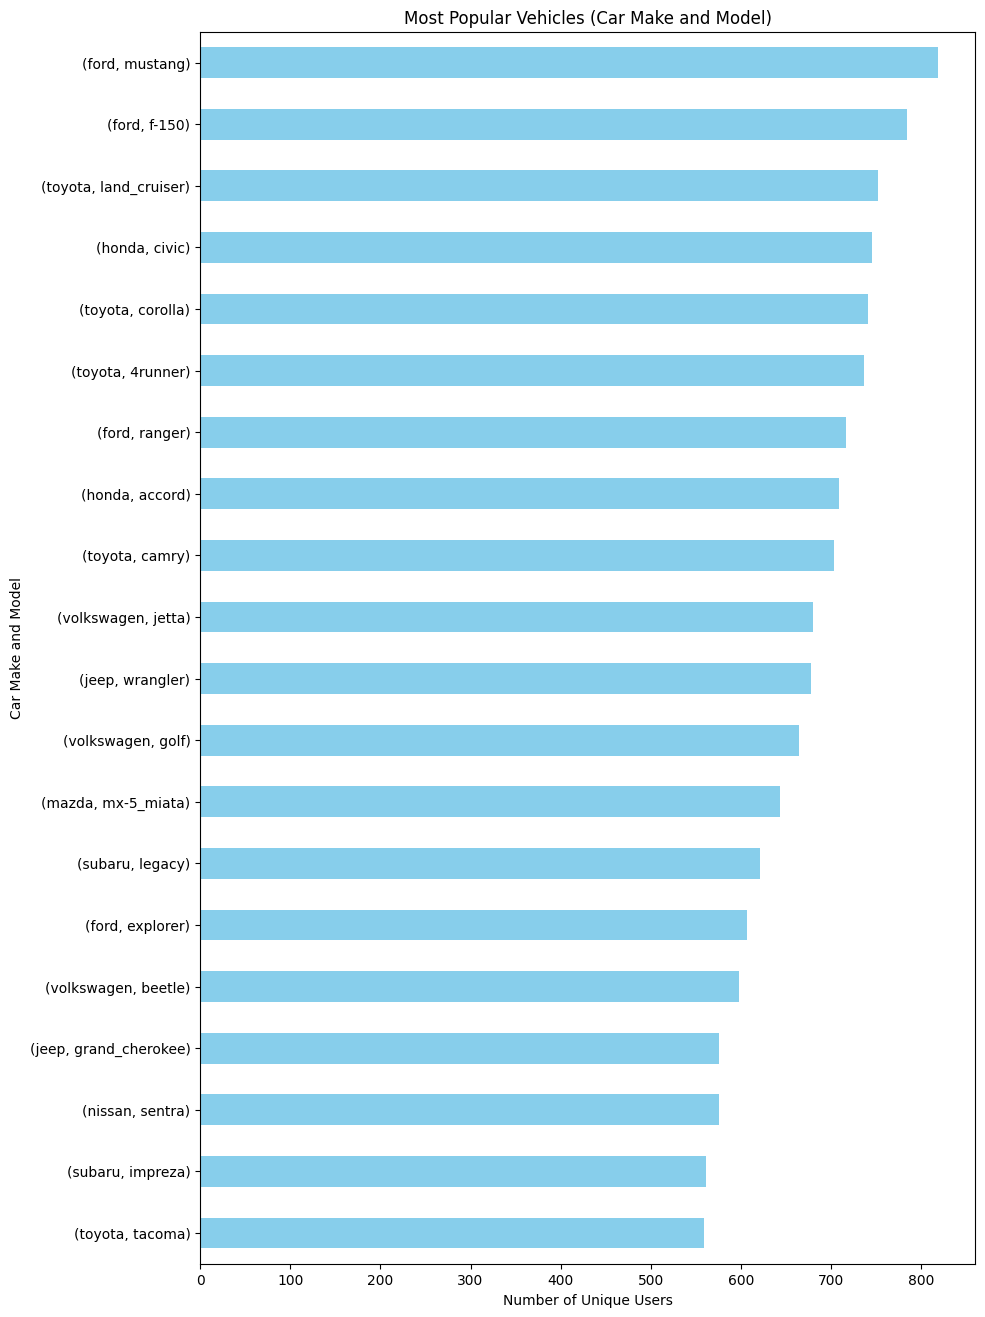

In [23]:
# 3.4
# Makes and Models

popular_vehicles = df_latest_age.groupby(['car_make', 'model'])['user_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 16))
popular_vehicles.head(20).plot(kind='barh', color='skyblue')  # Display top 20 for readability
plt.title('Most Popular Vehicles (Car Make and Model)')
plt.xlabel('Number of Unique Users')
plt.ylabel('Car Make and Model')
plt.gca().invert_yaxis()  
plt.show()

# Question 4 #

### 4.1 ###


In [24]:

# Question 4.1
# 4.1.1 Identify the top 5 currencies by number of transactions

def replace_negatives(df):
    for col in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)
    return df
df = replace_negatives(df)
df = df.dropna()

filtered_df = df.dropna().copy()
currency_counts = filtered_df['currency'].value_counts()
print(currency_counts)

top_5_currencies = currency_counts.head(5)
print(top_5_currencies)
top_5_currencies = filtered_df['currency'].value_counts().head(5).index



currency
$      660793
£       58343
€       51408
CA$     33286
R       31398
        ...  
KGS         9
L$          9
MAD         9
YR          4
IQD         4
Name: count, Length: 120, dtype: int64
currency
$      660793
£       58343
€       51408
CA$     33286
R       31398
Name: count, dtype: int64


In [25]:
# print(df.columns.tolist())
df = df.drop(columns=['cost_per_gallon','total_spent','valid_date_fueled','day_of_month'])
# print(df.columns.tolist())
# Delete : day of month

Before isoforest 835228


c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\A

After isoforest 776722
Before iqr 776722
After iqr 640267
before mismatch clean 640267
after mismatch clean 636562
Count =  418703


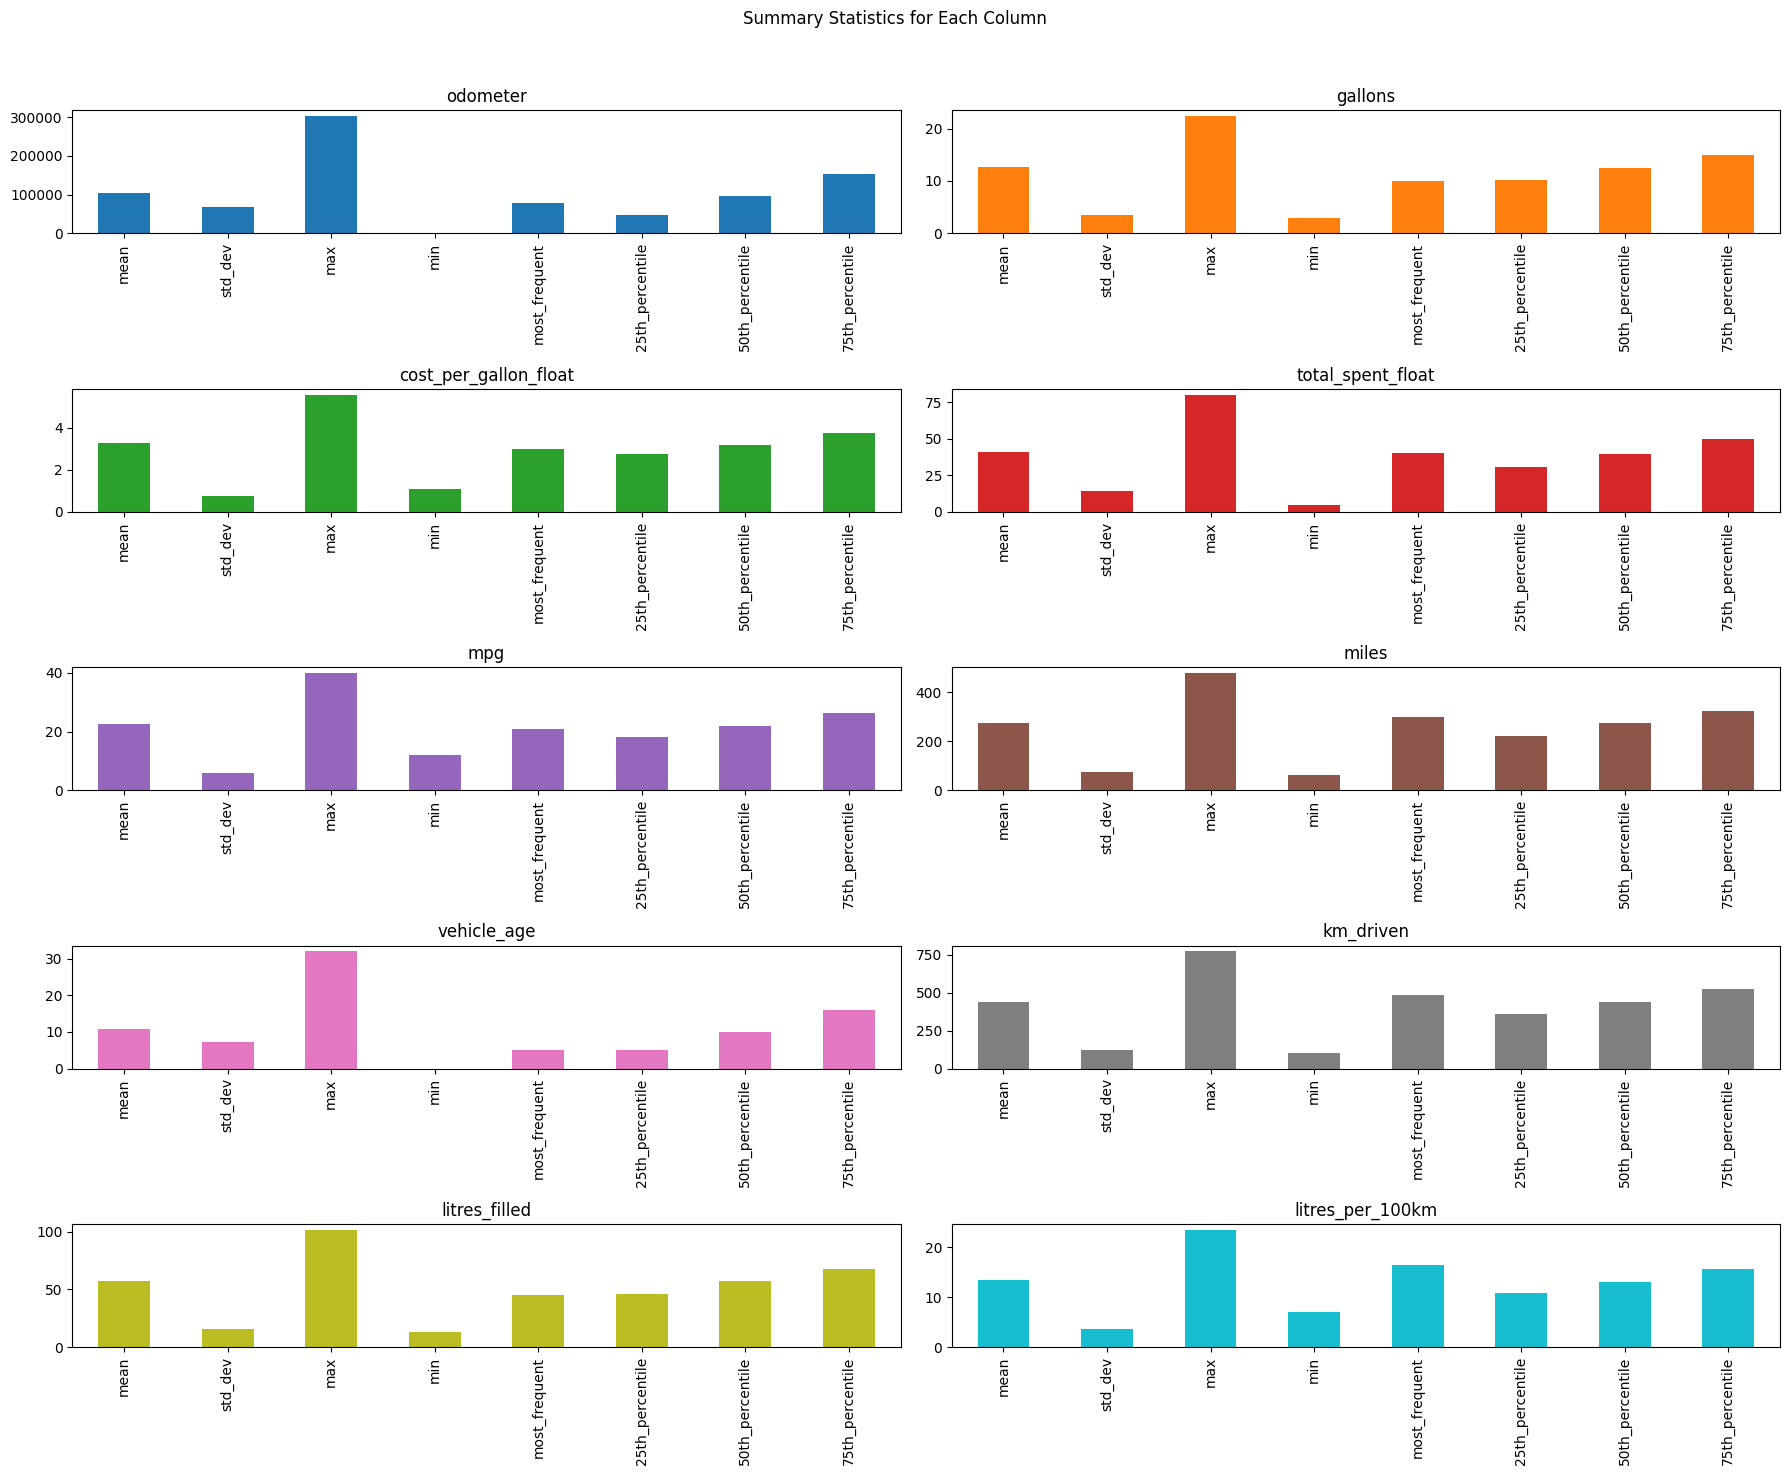

Count =  38303


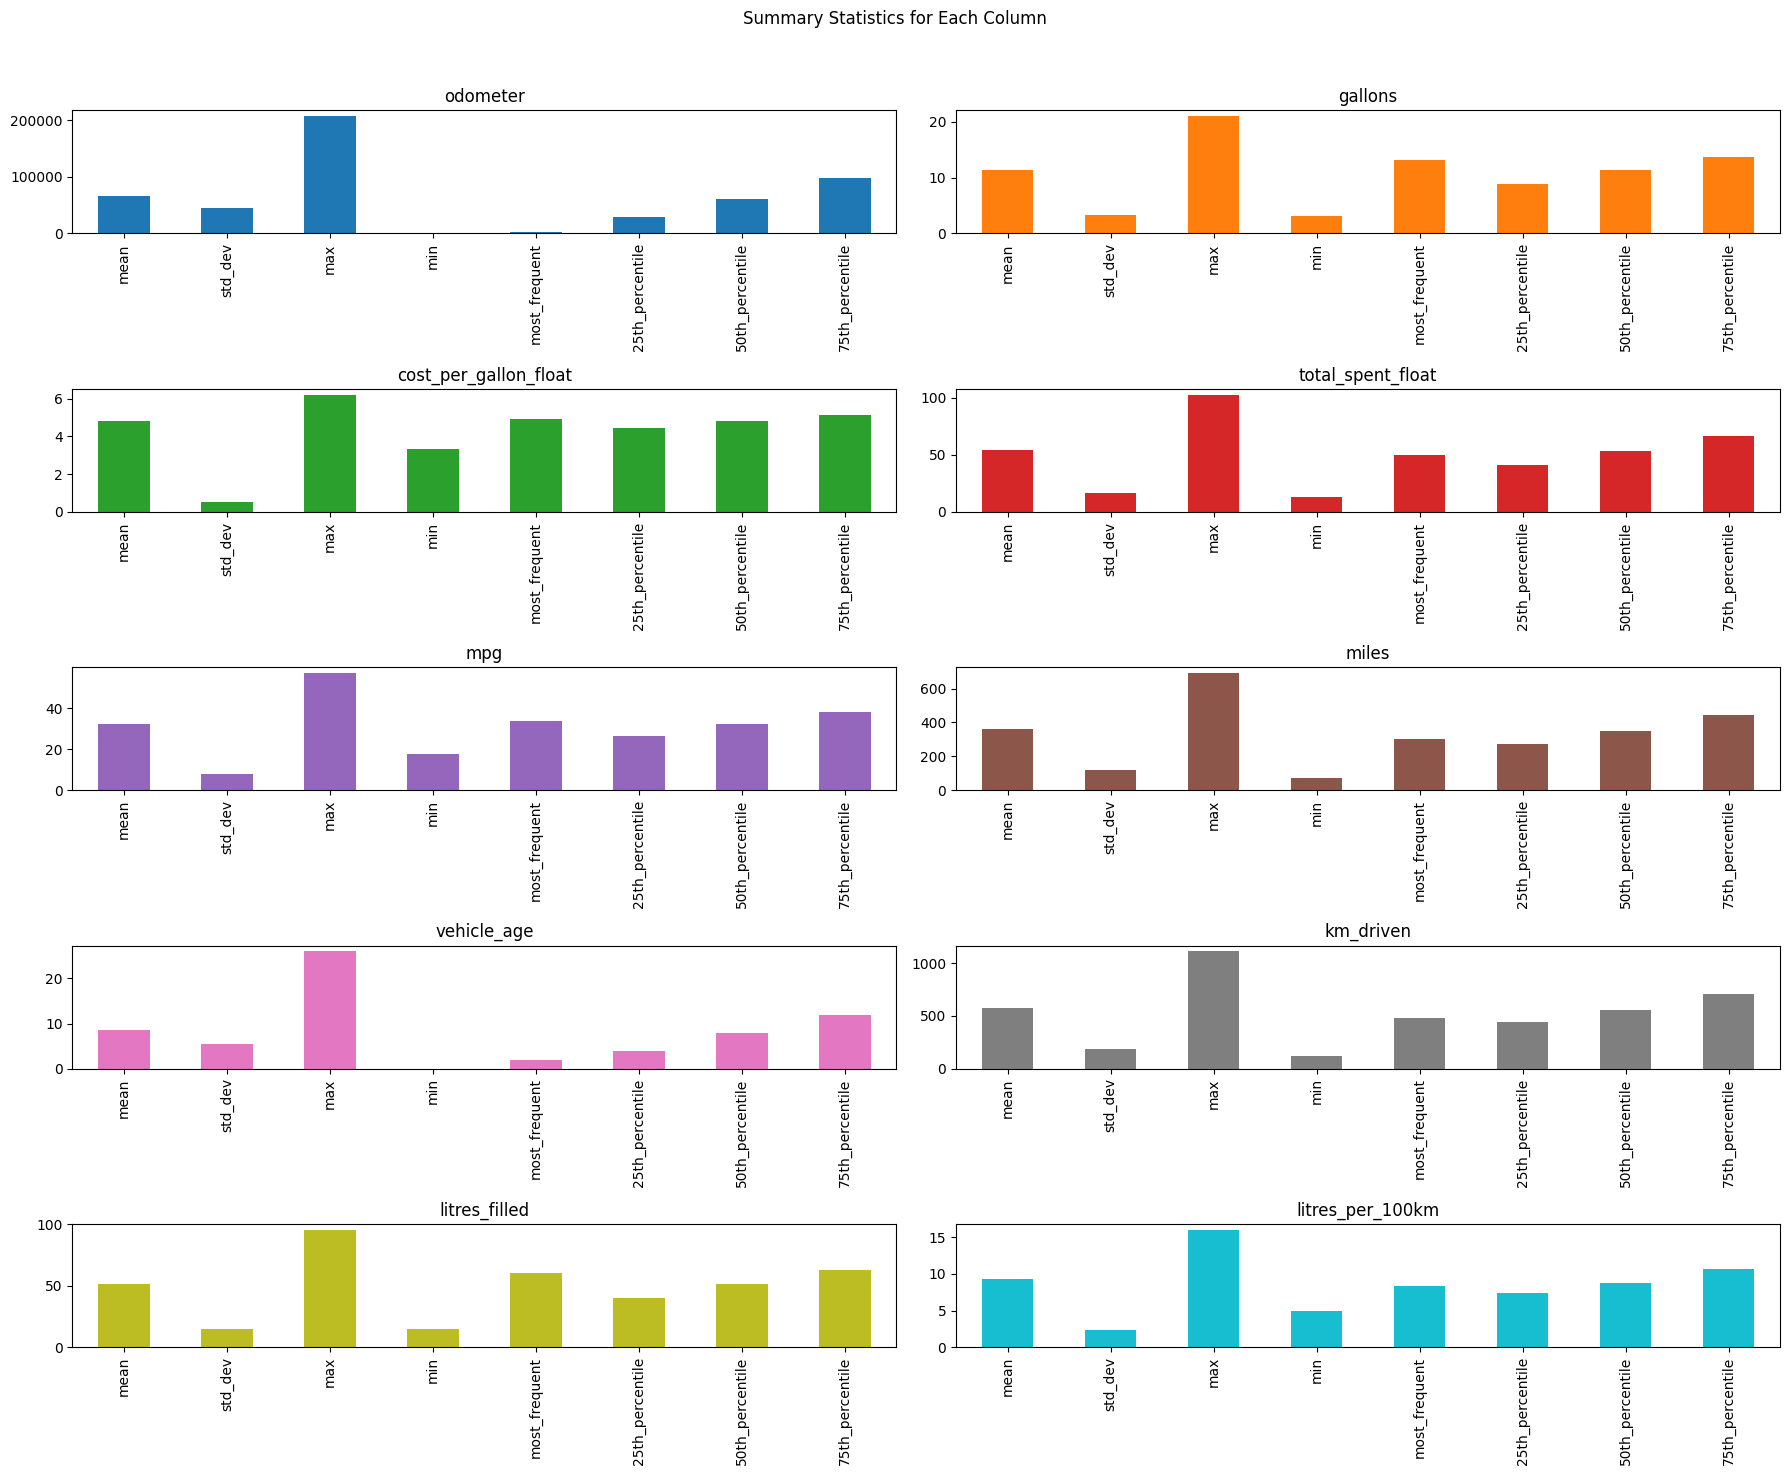

Count =  31253


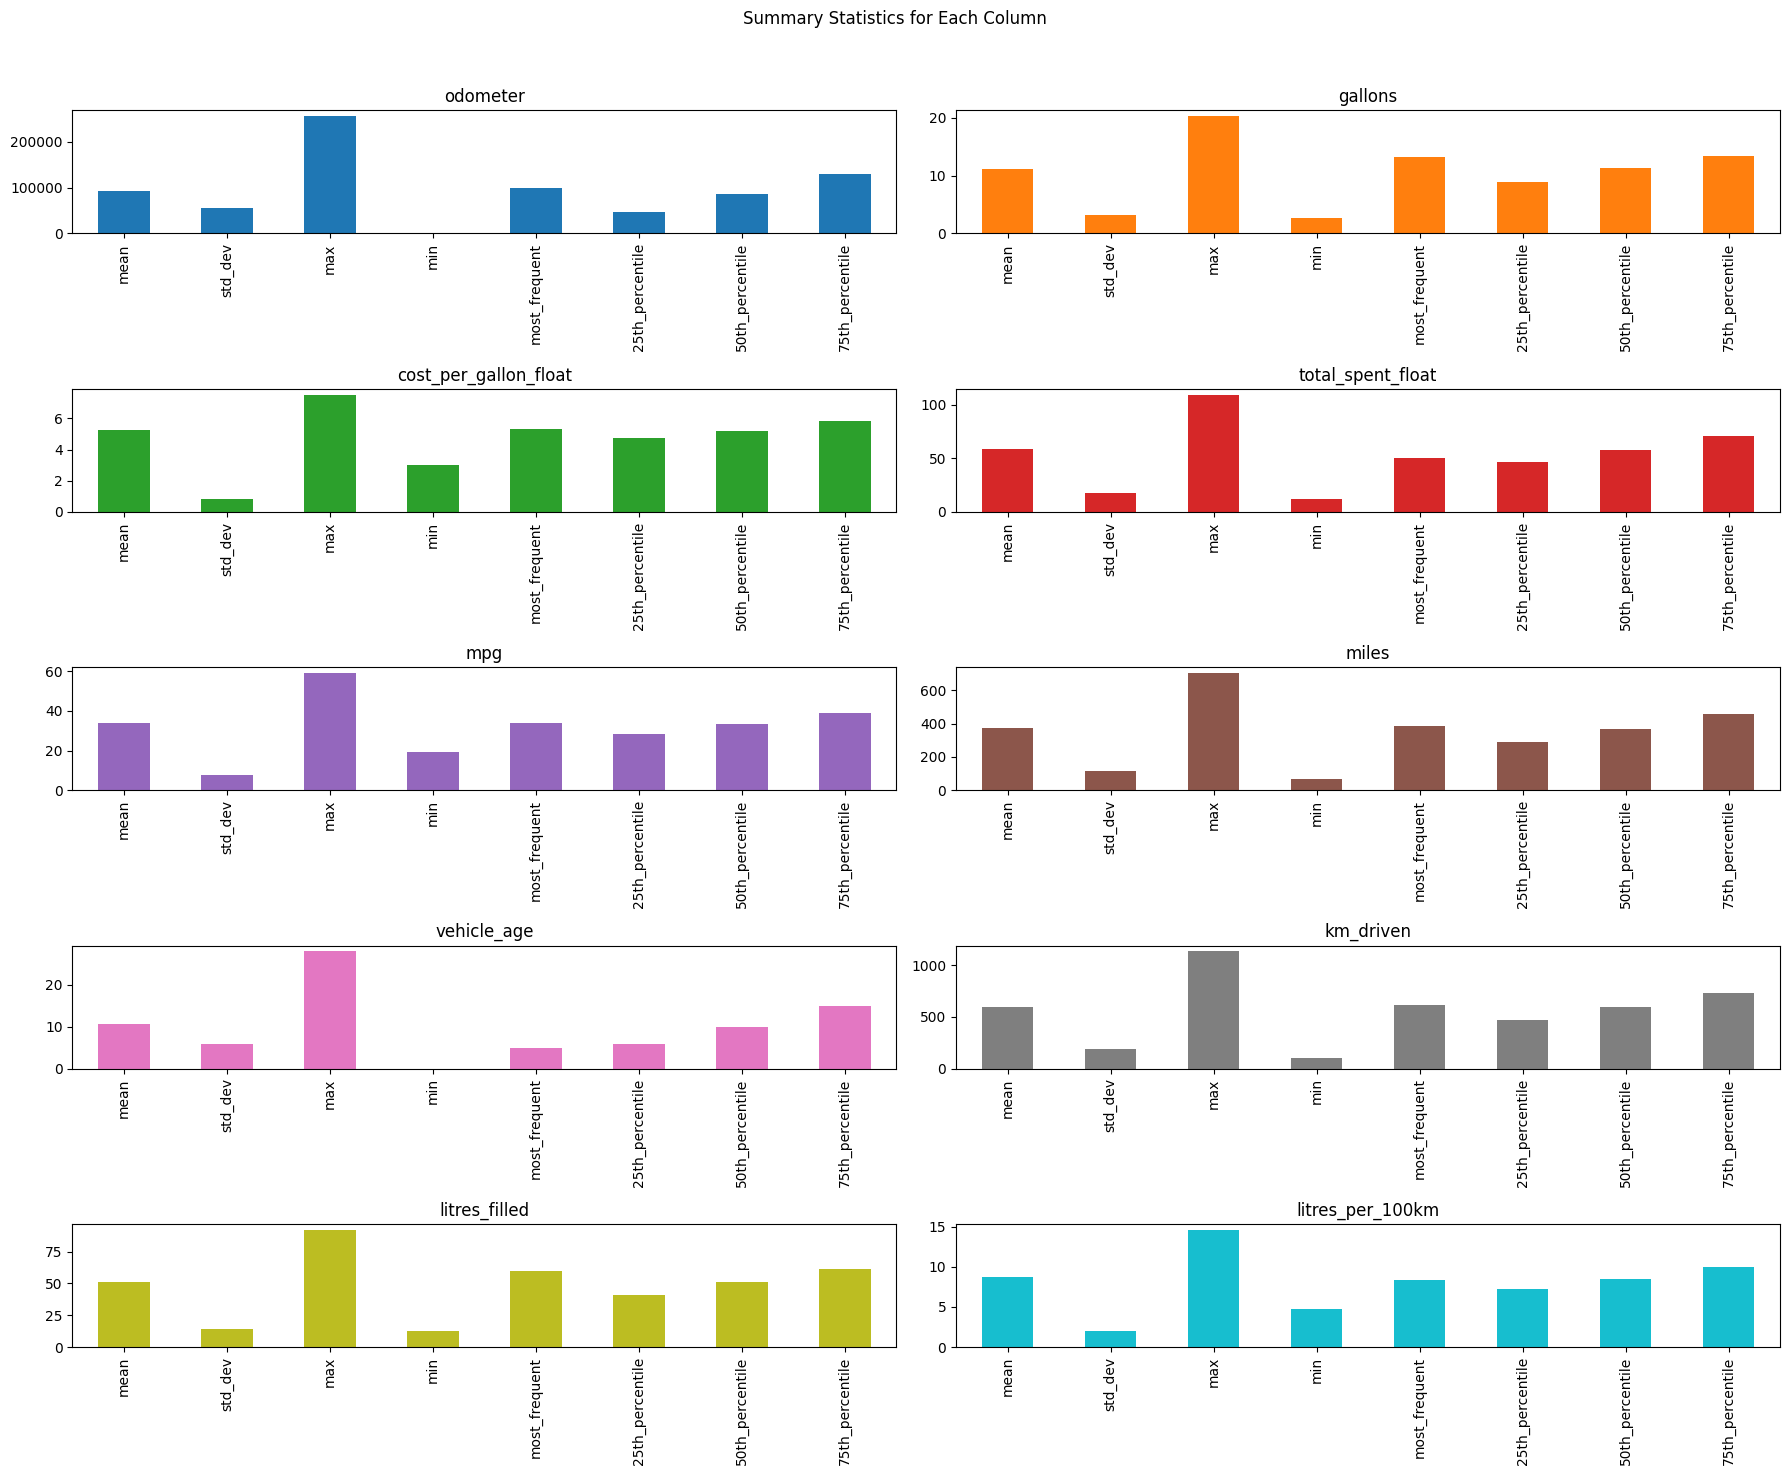

Count =  22191


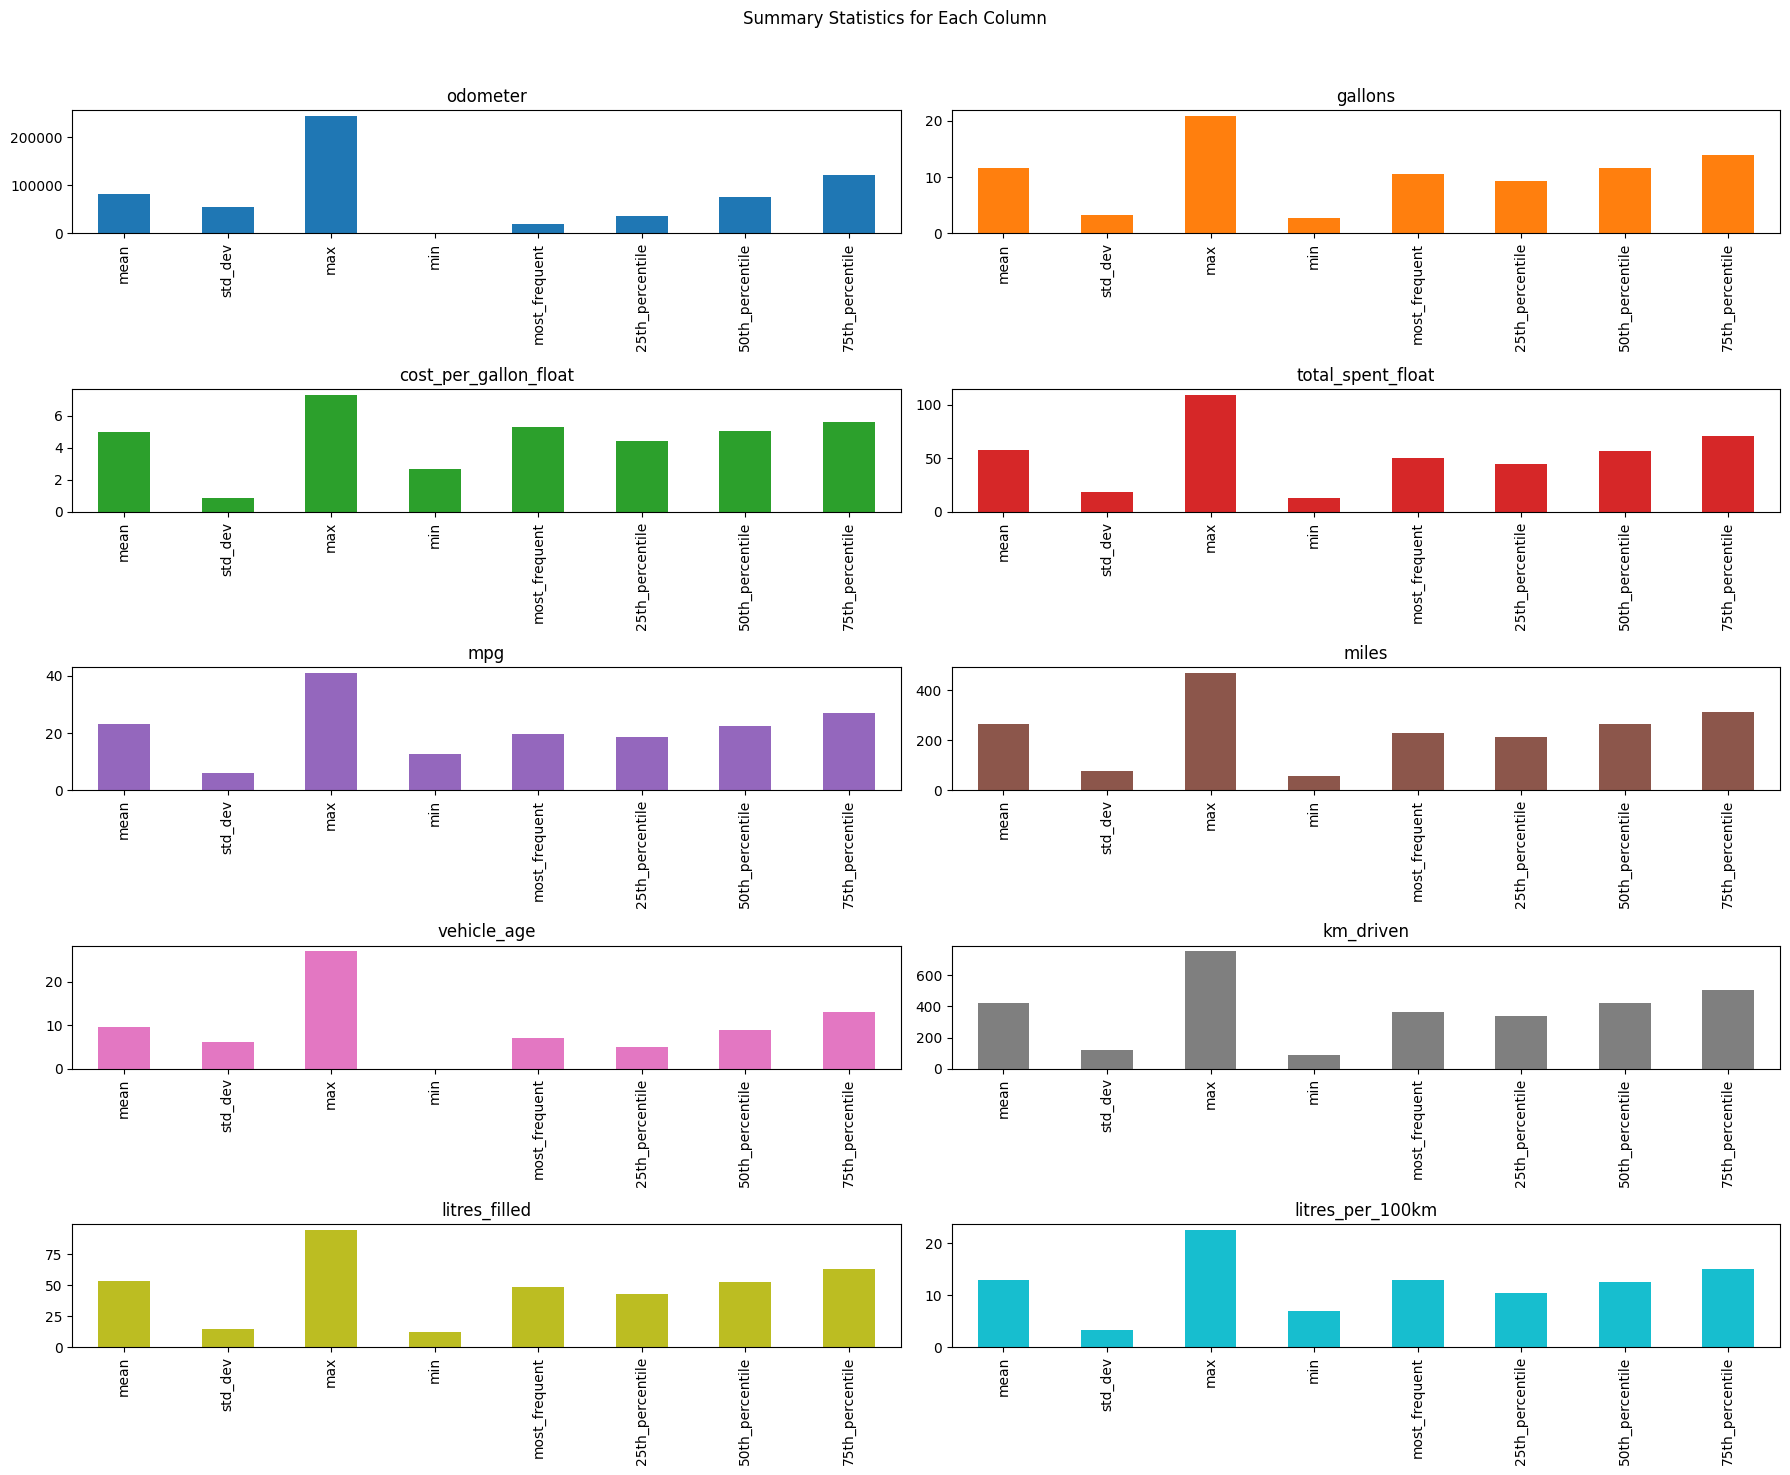

Count =  19788


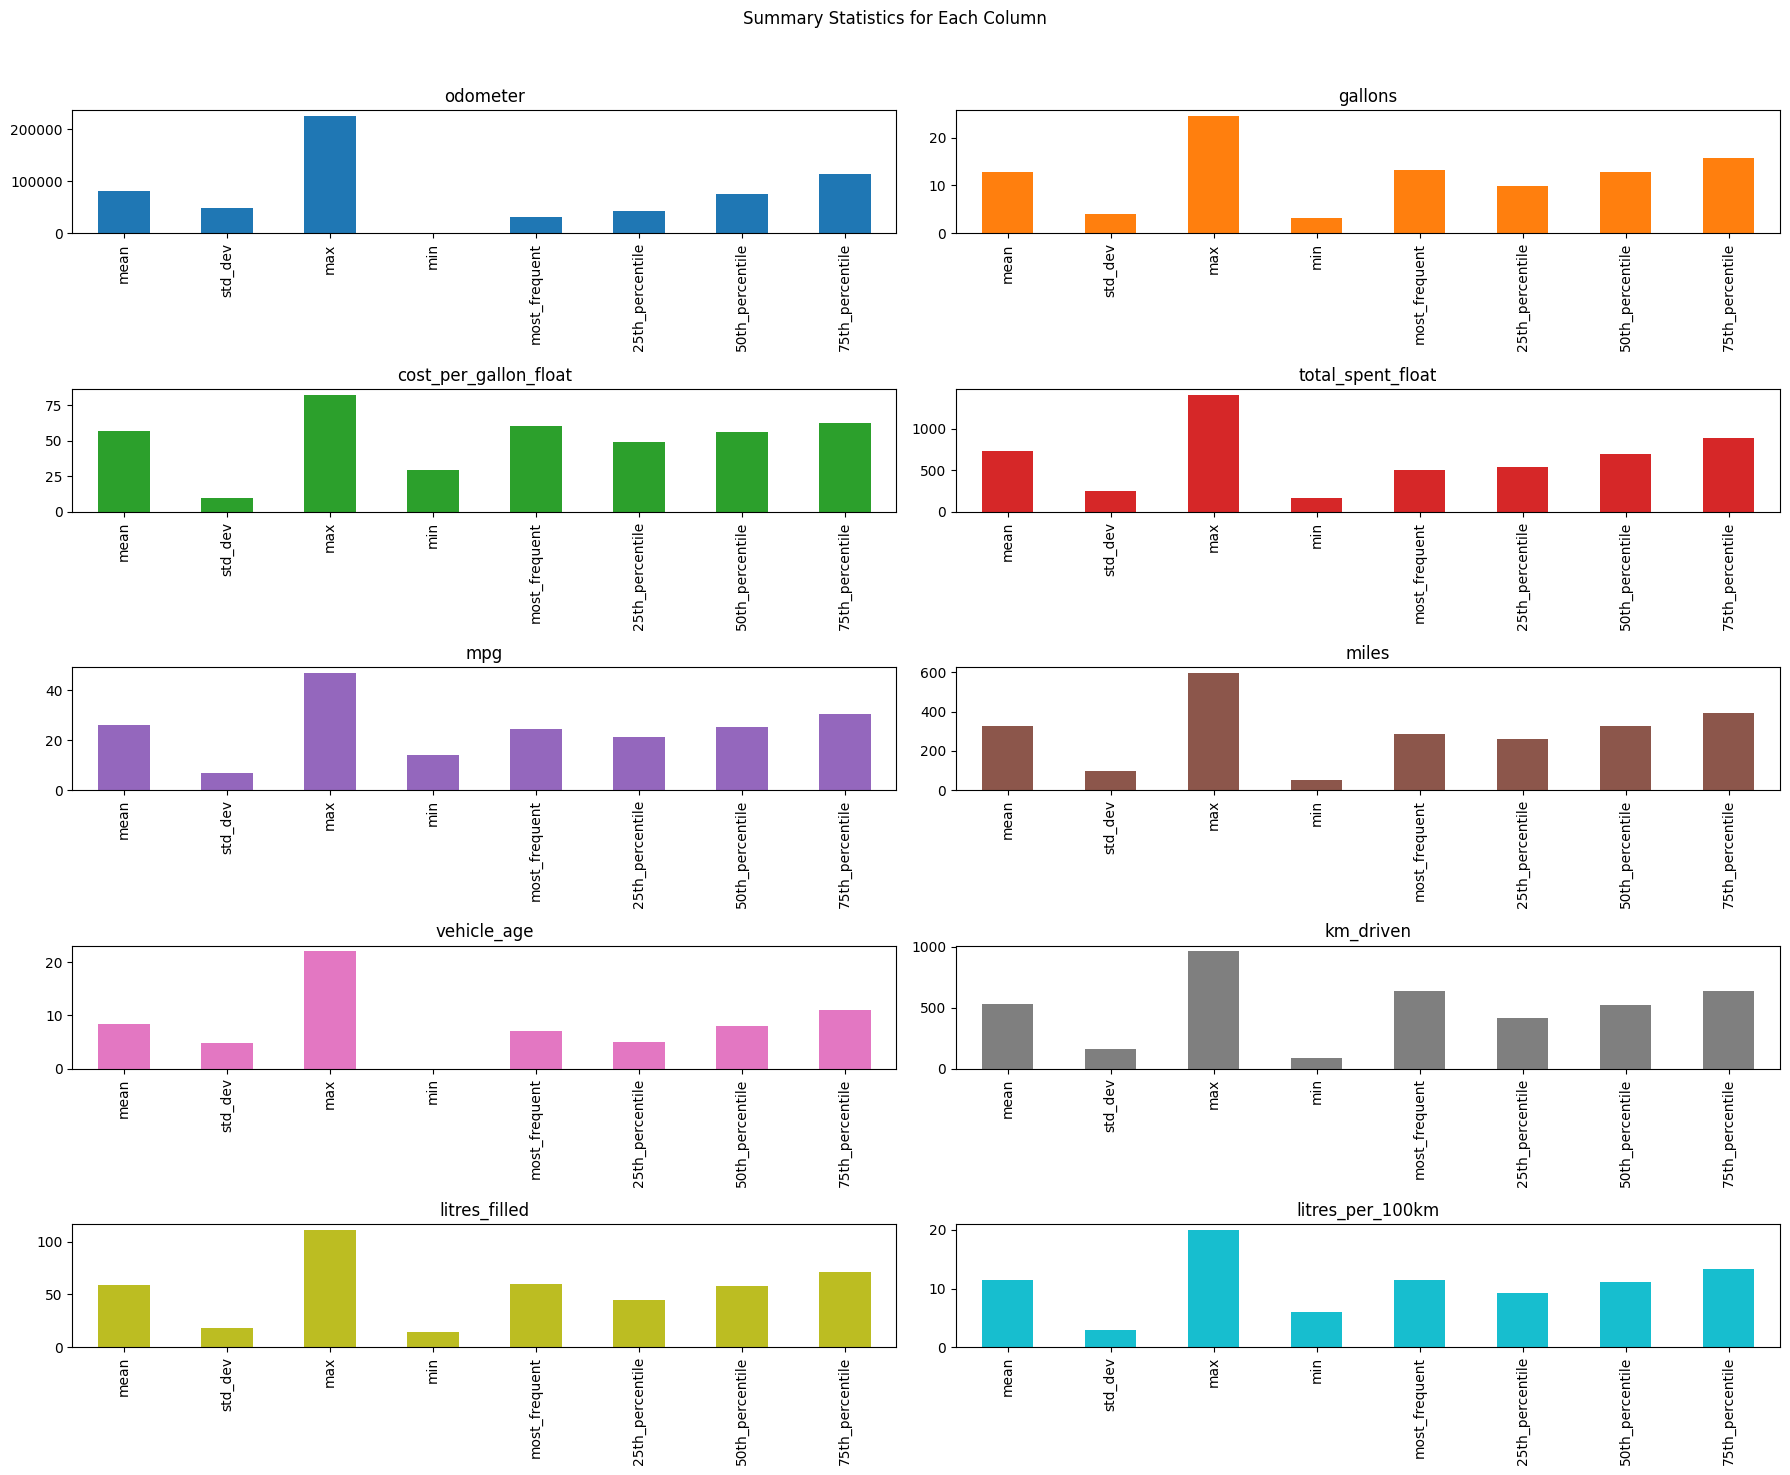

Shape before: 835228
Shape after: 530238


In [26]:

# 4.1.2 Removing outliers
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest
from sklearn.decomposition import PCA




def clean_iforest(df_in,top_5_currencies,columns):
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies)]
    temp_df = df_in.copy()
    for country in top_5_currencies:
        
        # Filter the DataFrame for the current currency
        country_df = df_top_5.loc[df_top_5['currency'] == country]
        country_df.dropna()
        numerical_df = country_df[columns].copy()
        numerical_df.dropna()
        iso_forest = IForest(contamination=0.2, random_state=42)
        # Initialize and fit IFOREST
        iso_forest.fit(numerical_df)

        # Step 3: Get the outlier predictions and decision function scores
        outlier_predictions = iso_forest.predict(numerical_df)
        outlier_scores = iso_forest.decision_function(numerical_df)

        # Step 4: Perform PCA for 2D visualization
        outlier_indices = numerical_df.index[outlier_predictions == 1]
        temp_df = temp_df.drop(index=outlier_indices)
        
    return temp_df

def clean_abod_chunking(df_in,top_5_currencies,columns):
    
    temp_df = df_in.copy()
    
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies)]
    for country in top_5_currencies:
        country_df = df_top_5.loc[df_top_5['currency'] == country]
        numerical_df = country_df[columns]
        chunk_size = 10000
        abod = ABOD()        
        for start in range(0, numerical_df.shape[0], chunk_size):
            end = min(start + chunk_size, numerical_df.shape[0])
            chunk = numerical_df.iloc[start:end]

            # Normalize the chunk

            # Fit ABOD to the chunk
            abod.fit(chunk)

            # Get outlier scores and predictions
            outlier_predictions = abod.predict(chunk)
            outlier_scores = abod.decision_function(chunk)

            # Store results
            outlier_indices = chunk.index[outlier_predictions == 1]
            temp_df = temp_df.drop(index=outlier_indices)
    return temp_df

def clean_IQR(df_in, columns):
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies)]
    temp_df = df_in.copy()
    
    temp_df.dropna()
    
    for country in top_5_currencies:
        # Filter the DataFrame for the current currency
        country_df = df_top_5.loc[df_top_5['currency'] == country]
        country_df.dropna()
        for column in columns:
            Q1 = float(country_df[column].quantile(0.25))
            Q3 = float(country_df[column].quantile(0.75))
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            country_df = country_df[(country_df[column] >= lower_bound) & (country_df[column] <= upper_bound)]        
        # Update temp_df with the filtered country_df
        temp_df = pd.concat([temp_df[temp_df['currency'] != country], country_df], ignore_index=True)
    
    return temp_df      

def clean_currency_costpergallon_missmatch(df_in_cleaned,precision = 0):
    # need to make sure that total spent / gallons = costper gamlon
    print("before mismatch clean",df_in_cleaned.shape[0])
    
    df_cleaned = df_in_cleaned[
        round(df_in_cleaned['total_spent_float'] / df_in_cleaned['gallons'], precision) == 
        round(df_in_cleaned['cost_per_gallon_float'], precision)
    ]    
    print("after mismatch clean",df_cleaned.shape[0])
    return df_cleaned
    
    

def Debug_by_Currency(top_5_currencies_in,df_in, columns):
    
    # get all that are in top 5 currencies
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies_in)]
    # columns = ['odometer', 'gallons', 'cost_per_gallon_float', 'total_spent_float', 'mpg', 'miles']

    for country in top_5_currencies_in:
        df_selected = df_top_5[df_top_5['currency'] == country]
        print("Count = ", df_selected['odometer'].count())
        df_selected = df_selected[columns]
        statistics = {
            'mean': df_selected.mean(),
            'std_dev': df_selected.std(),
            'max': df_selected.max(),
            'min': df_selected.min(),
            'most_frequent': df_selected.mode().iloc[0],  # Mode might return multiple values; take the first one
            '25th_percentile': df_selected.quantile(0.25),
            '50th_percentile': df_selected.median(),  # same as the 50th percentile (second quartile)
            '75th_percentile': df_selected.quantile(0.75)
        }

        statistics_df = pd.DataFrame(statistics)
        statistics_df.T.plot(kind='bar', figsize=(18, 15), subplots=True, layout=(5, 2), sharex=False, sharey=False, legend=False)
        plt.suptitle('Summary Statistics for Each Column')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

columns = ['odometer', 'gallons', 'cost_per_gallon_float', 'total_spent_float', 'mpg', 'miles','vehicle_age','km_driven','litres_filled','litres_per_100km',]

shape_before = df[df['currency'].isin(top_5_currencies)]
# Drop negatives

# clean with isoforest
print("Before isoforest",shape_before.shape[0])
temp_df = clean_iforest(df,top_5_currencies,columns)
print("After isoforest",temp_df.shape[0])


# clean with iqr
print("Before iqr",temp_df.shape[0])
temp_df = clean_IQR(temp_df,columns)
print("After iqr",temp_df.shape[0])
# If someone uses the wrong currency, either it will be reflectin the cost per gallons and become an outlier,
# and if not then there will be an arithmatical missmatch between the cot of gallons, total spent and the gallons. 
temp_df = clean_currency_costpergallon_missmatch(temp_df)
### Debugging ####
Debug_by_Currency(top_5_currencies,temp_df,columns)
##################
df_top_5_cleaned = temp_df[temp_df['currency'].isin(top_5_currencies)]

df = df_top_5_cleaned

# 4.1.3 Change in number of entries
print("Shape before:",shape_before.shape[0])
print("Shape after:",df_top_5_cleaned.shape[0])


### 4.2 ###


C:\Users\Tumi\AppData\Local\Temp\ipykernel_5080\3224380132.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')


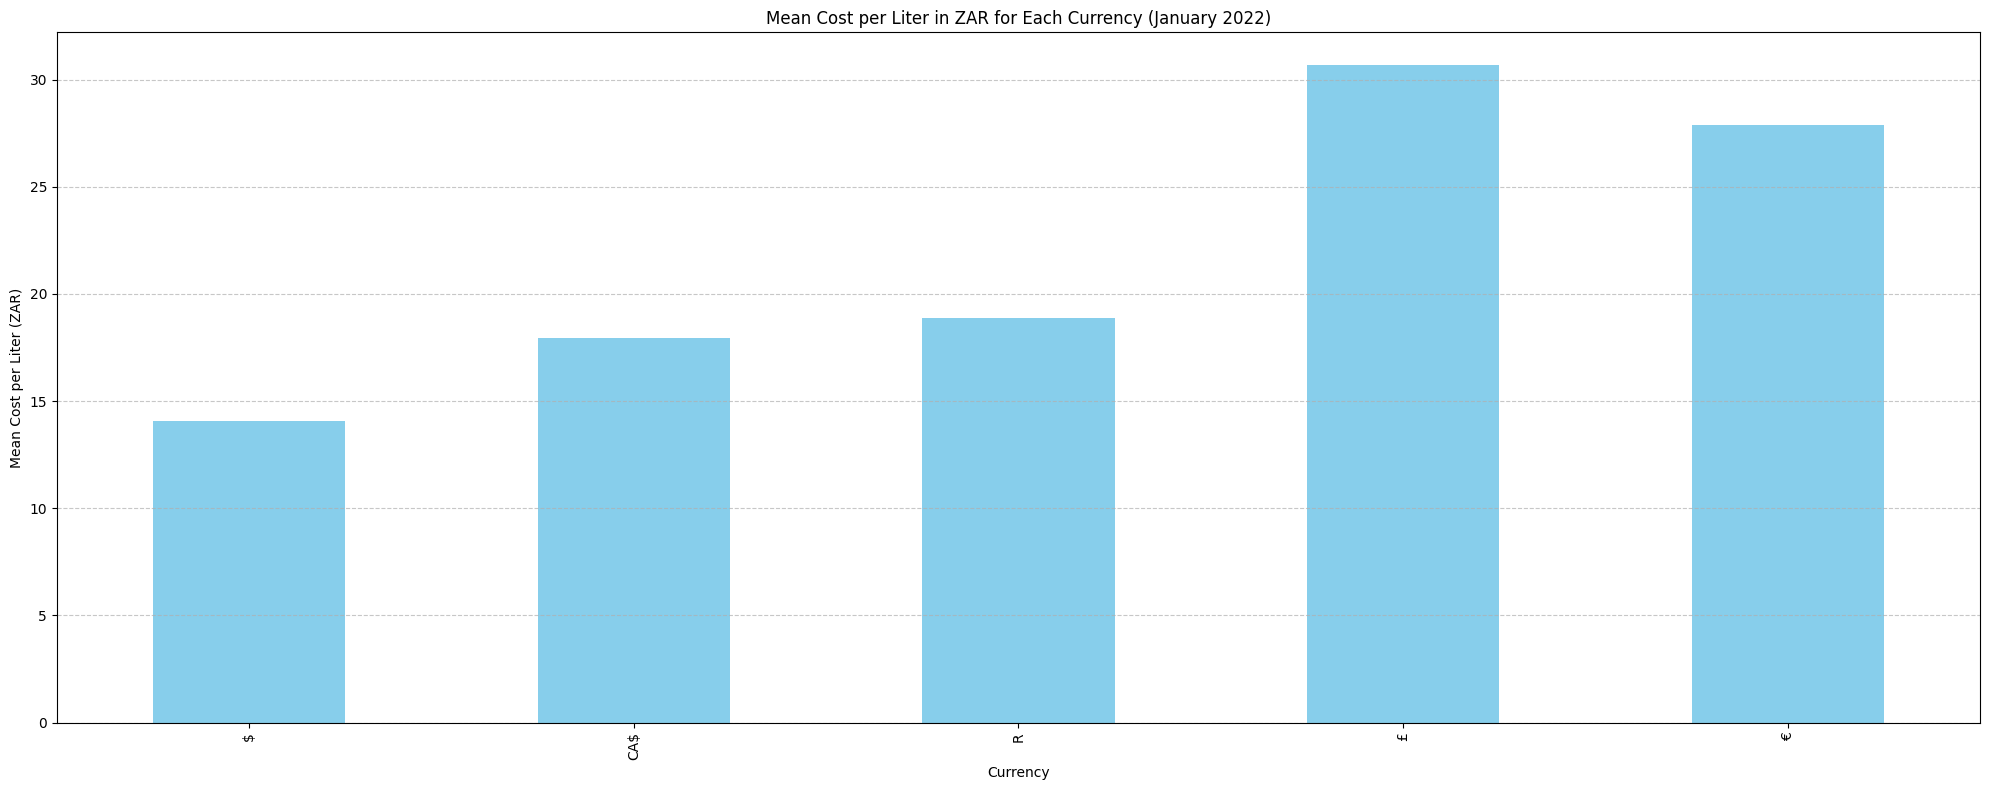

In [27]:
#4.2.1

# Feul efficiency and cost per litre in different countries
# Conversion map
country_to_conversion_rate = {
    '$': 15.3823251591,
    '£': 21.04047696756128,
    '€': 17.55691938247276,
    'CA$': 12.251039269863115,
    'R': 1

}


df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Filter for January 2022
jan_2022_df = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)].copy()

def convert_to_zar(row):
    currency = row['currency']
    if currency in country_to_conversion_rate:
        conversion_rate = country_to_conversion_rate[currency]
        cost_per_gallon_zar = row['cost_per_gallon_float'] * conversion_rate
        cost_per_liter_zar = cost_per_gallon_zar / 3.78541  # Gallon to liter conversion
        return cost_per_liter_zar
    else:
        return None


jan_2022_df['cost_per_liter_zar'] = jan_2022_df.apply(convert_to_zar, axis=1)


jan_2022_df = jan_2022_df.dropna(subset=['cost_per_liter_zar'])
mean_cost_per_liter_per_currency = jan_2022_df.groupby('currency')['cost_per_liter_zar'].mean()

# Plot mean cost per liter per currency
plt.figure(figsize=(20, 8))
mean_cost_per_liter_per_currency.plot(kind='bar', color='skyblue')

plt.xlabel('Currency')
plt.ylabel('Mean Cost per Liter (ZAR)')
plt.title('Mean Cost per Liter in ZAR for Each Currency (January 2022)')
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()





In [28]:
# 4.2.2 
# Missing a fuel up

df = df.sort_values(['user_id', 'date_fueled'])

df['odometer_diff'] = df.groupby('user_id')['odometer'].diff()

avg_diff = df.groupby('user_id')['odometer_diff'].mean()

df = df.merge(avg_diff.rename('avg_odometer_diff'), on='user_id')
df['potential_missed_fillup'] = df['odometer_diff'] > (2 * df['avg_odometer_diff'])
missed_fillups_count = df['potential_missed_fillup'].sum()

print(f"Estimated number of missed fill-ups: {missed_fillups_count}")

Estimated number of missed fill-ups: 49103


Country with the largest average distance per tank: €, Distance: 881.8683517417162 km


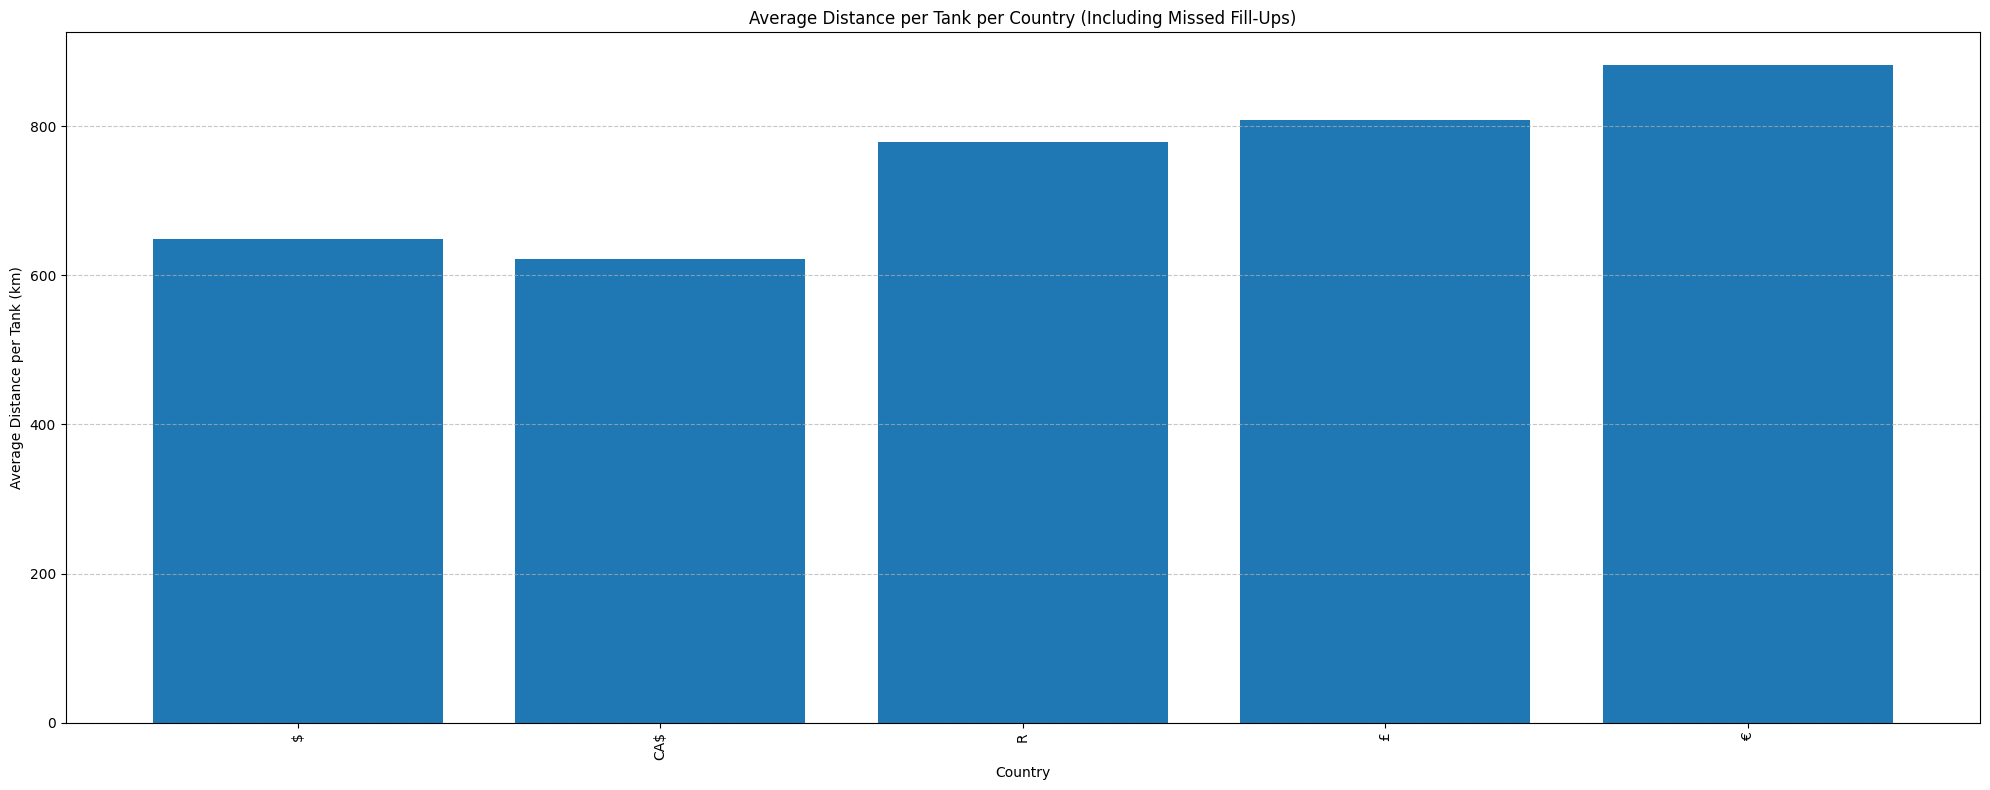

In [29]:
# 4.2.3
# Average distance per tank per country/currency
df = df.sort_values(by=['user_url', 'odometer'])

df['distance_per_fill'] = df.groupby('user_url')['odometer'].diff()

df = df.dropna(subset=['distance_per_fill'])

df_no_missed = df[~df['potential_missed_fillup']]

average_distance_per_tank = df_no_missed.groupby('currency')['distance_per_fill'].mean().reset_index()

average_distance_per_tank.columns = ['currency', 'avg_distance_per_tank_km']

max_distance_country = average_distance_per_tank.loc[average_distance_per_tank['avg_distance_per_tank_km'].idxmax()]

print(f"Country with the largest average distance per tank: {max_distance_country['currency']}, Distance: {max_distance_country['avg_distance_per_tank_km']} km")


plt.figure(figsize=(20, 8))
plt.bar(average_distance_per_tank['currency'], average_distance_per_tank['avg_distance_per_tank_km'])
plt.xlabel('Country')
plt.ylabel('Average Distance per Tank (km)')
plt.title('Average Distance per Tank per Country (Including Missed Fill-Ups)')
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

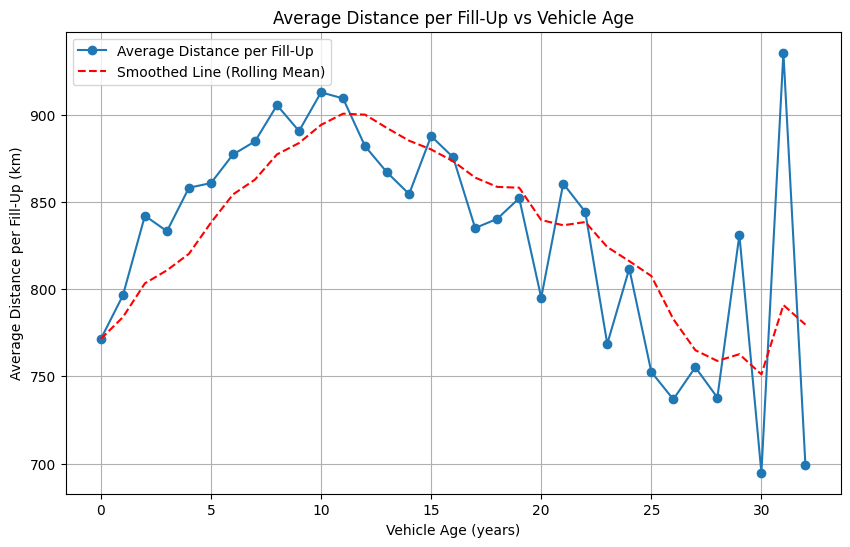

In [30]:
#4.2.4
# Do newer vehicles drive further ?
# df['vehicle_age'] = df['date_fueled'].dt.year - df['year']
avg_distance_by_age = df.groupby('vehicle_age')['distance_per_fill'].mean().reset_index()

avg_distance_by_age.columns = ['vehicle_age', 'avg_distance_per_fill_km']
rolling_window = 5 
avg_distance_by_age['smoothed'] = avg_distance_by_age['avg_distance_per_fill_km'].rolling(window=rolling_window, min_periods=1).mean()
# Plot the average distance per fill-up by vehicle age
plt.figure(figsize=(10, 6))
plt.plot(avg_distance_by_age['vehicle_age'], avg_distance_by_age['avg_distance_per_fill_km'], marker='o', label='Average Distance per Fill-Up')
plt.plot(avg_distance_by_age['vehicle_age'], avg_distance_by_age['smoothed'], color='red', label='Smoothed Line (Rolling Mean)', linestyle='--')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Average Distance per Fill-Up (km)')
plt.title('Average Distance per Fill-Up vs Vehicle Age')
plt.grid(True)
plt.legend()
plt.show()





In [31]:
df.columns

Index(['date_fueled', 'date_captured', 'odometer', 'gallons', 'mpg', 'miles',
       'user_url', 'currency', 'total_spent_float', 'cost_per_gallon_float',
       'car_make', 'model', 'year', 'user_id', 'litres_filled', 'km_driven',
       'litres_per_100km', 'vehicle_age', 'odometer_diff', 'avg_odometer_diff',
       'potential_missed_fillup', 'distance_per_fill'],
      dtype='object')

In [33]:
# 4.2.5
# Most popular vehicles in sa

sa_vehicles_df = df[df['currency'] == 'R'].copy()

top_vehicles = sa_vehicles_df.groupby(['car_make', 'model']).size().nlargest(5).index

top_vehicles_df = sa_vehicles_df[sa_vehicles_df.set_index(['car_make', 'model']).index.isin(top_vehicles)].copy()

fuel_efficiency = top_vehicles_df.groupby(['car_make', 'model'])['litres_per_100km'].mean().reset_index()

fuel_efficiency = fuel_efficiency.sort_values(by='litres_per_100km', ascending=False)

fuel_efficiency




,car_make,model,litres_per_100km
0,mitsubishi,pajero,14.347408
3,toyota,hilux,13.300572
2,toyota,fortuner,13.193800
1,suzuki,jimny,11.187171
4,volkswagen,polo,9.248023


In [34]:
#4.2.6
# Which vehicle is most efficient

average_fuel_efficiency = df.groupby(['currency', 'car_make', 'model'])['litres_per_100km'].mean().reset_index()

top_5_per_country = average_fuel_efficiency.sort_values(by=['currency', 'litres_per_100km'], ascending=[True, False])
top_5_per_country = top_5_per_country.groupby('currency').head(5)

top_5_per_country

,currency,car_make,model,litres_per_100km
375,$,ford,sierra,22.873382
735,$,mercedes-benz,cls63_amg_s,22.796597
470,$,isuzu,bighorn,22.780777
1039,$,suzuki,ignis,22.419178
728,$,mercedes-benz,clk63_amg,22.391410
1307,CA$,bmw,535xi,21.370819
1461,CA$,lexus,gs460,21.239221
1452,CA$,land_rover,range_rover_sport,21.137135
1245,CA$,audi,rs6,20.651209
1413,CA$,jeep,commander,20.255758


C:\Users\Tumi\AppData\Local\Temp\ipykernel_5080\25507793.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada['season'] = df_canada['date_fueled'].apply(get_season)


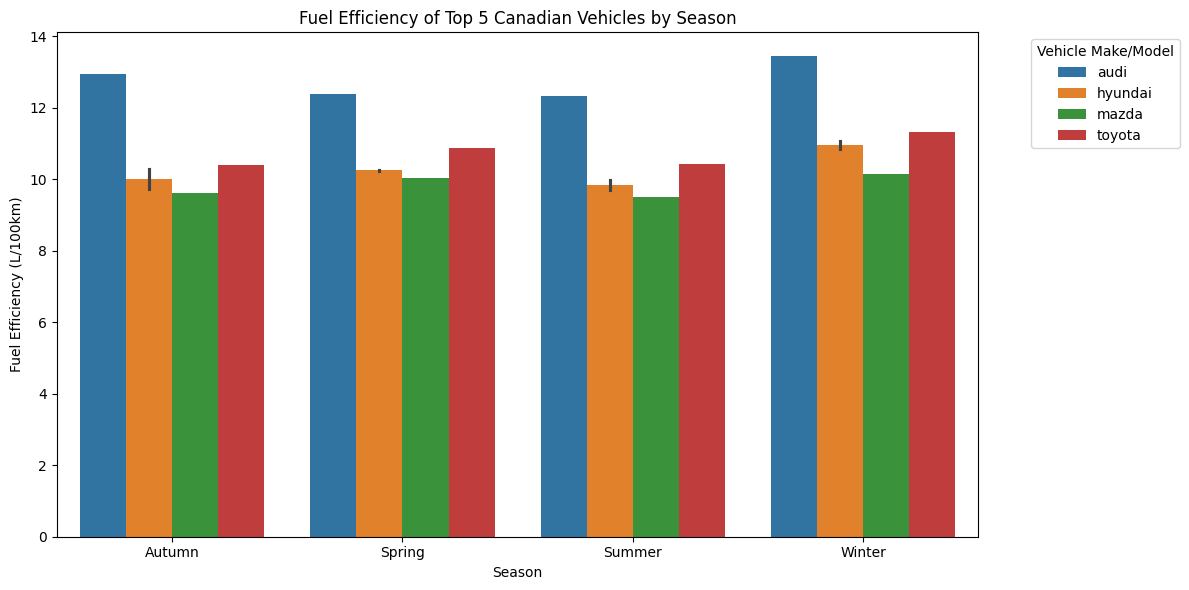

   car_make       model  season  litres_per_100km
0      audi  a4_quattro  Autumn         12.949754
1      audi  a4_quattro  Spring         12.378931
2      audi  a4_quattro  Summer         12.316949
3      audi  a4_quattro  Winter         13.431604
4   hyundai      accent  Autumn         10.279212
5   hyundai      accent  Spring         10.263388
6   hyundai      accent  Summer          9.689958
7   hyundai      accent  Winter         11.062980
8   hyundai     elantra  Autumn          9.725379
9   hyundai     elantra  Spring         10.230206
10  hyundai     elantra  Summer          9.981790
11  hyundai     elantra  Winter         10.848173
12    mazda     3_sport  Autumn          9.615601
13    mazda     3_sport  Spring         10.028177
14    mazda     3_sport  Summer          9.499045
15    mazda     3_sport  Winter         10.152063
16   toyota      matrix  Autumn         10.402222
17   toyota      matrix  Spring         10.856670
18   toyota      matrix  Summer         10.420157


In [35]:
#4.2.7
# Difference in fuel efficiency for top 5 canadian vehicles in different seasons
df_canada = df[df['currency'] == 'CA$']

top_5_vehicles = df_canada.groupby(['car_make', 'model']).size().nlargest(5).index.tolist()

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_canada['season'] = df_canada['date_fueled'].apply(get_season)

df_top5 = df_canada[df_canada.set_index(['car_make', 'model']).index.isin(top_5_vehicles)]
avg_efficiency = df_top5.groupby(['car_make', 'model', 'season'])['litres_per_100km'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='litres_per_100km', hue='car_make', data=avg_efficiency)
plt.title('Fuel Efficiency of Top 5 Canadian Vehicles by Season')
plt.xlabel('Season')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.legend(title='Vehicle Make/Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Optional: Print the data
print(avg_efficiency)

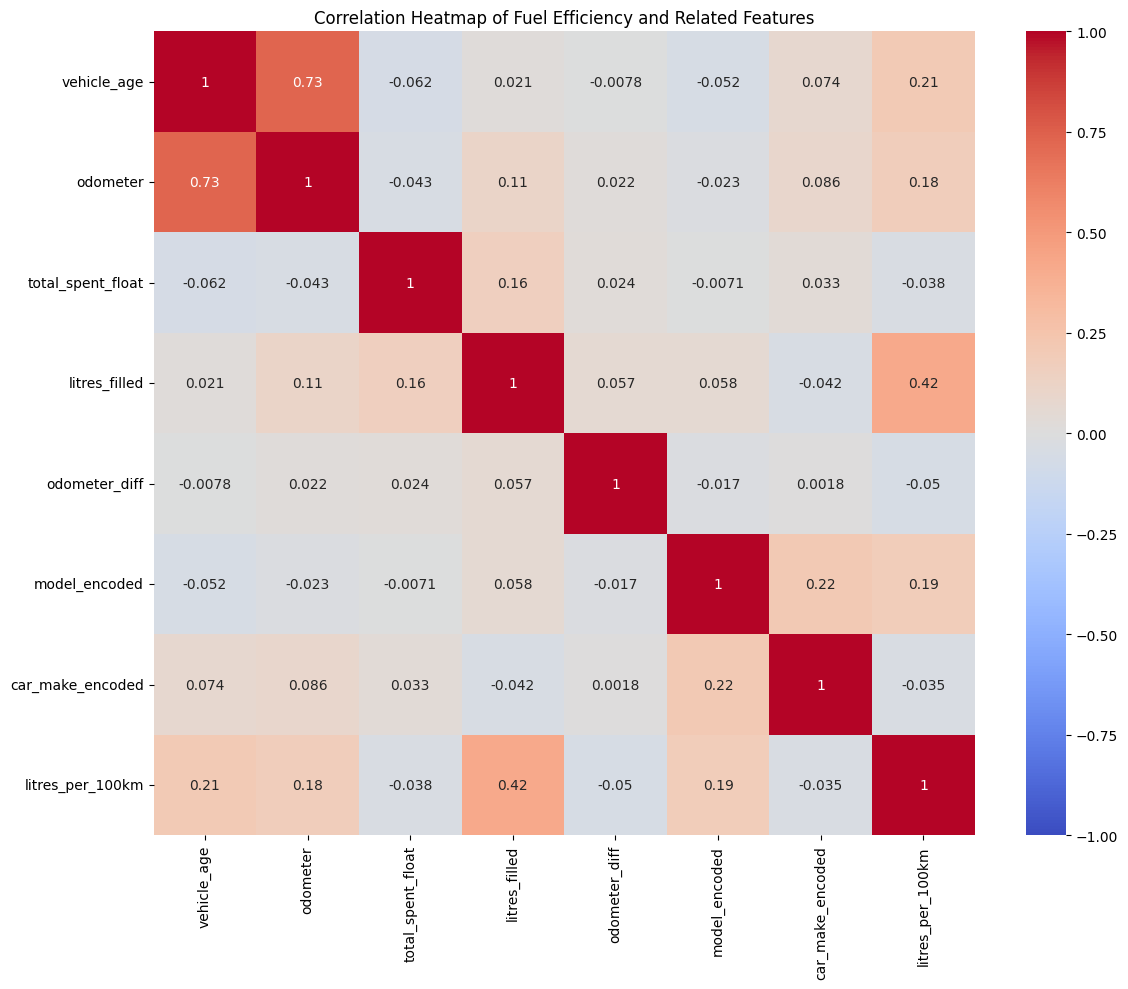


Correlations with litres_per_100km:
litres_per_100km     1.000000
litres_filled        0.417235
vehicle_age          0.205728
model_encoded        0.187408
odometer             0.175322
car_make_encoded    -0.035176
total_spent_float   -0.037832
odometer_diff       -0.050010
Name: litres_per_100km, dtype: float64


In [36]:
#4.2.8 
# Correlation between features of dataframe
df_temp = df.copy()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_temp['model_encoded'] = label_encoder.fit_transform(df_temp['model'])
df_temp['car_make_encoded'] = label_encoder.fit_transform(df_temp['car_make'])


features = ['vehicle_age', 'odometer', 'total_spent_float', 
             'litres_filled', 'odometer_diff', 'model_encoded', 'car_make_encoded', 'litres_per_100km']

corr_matrix = df_temp[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Fuel Efficiency and Related Features')
plt.tight_layout()
plt.show()

# Print the correlation values for a specific column if needed
print("\nCorrelations with litres_per_100km:")
print(corr_matrix['litres_per_100km'].sort_values(ascending=False))

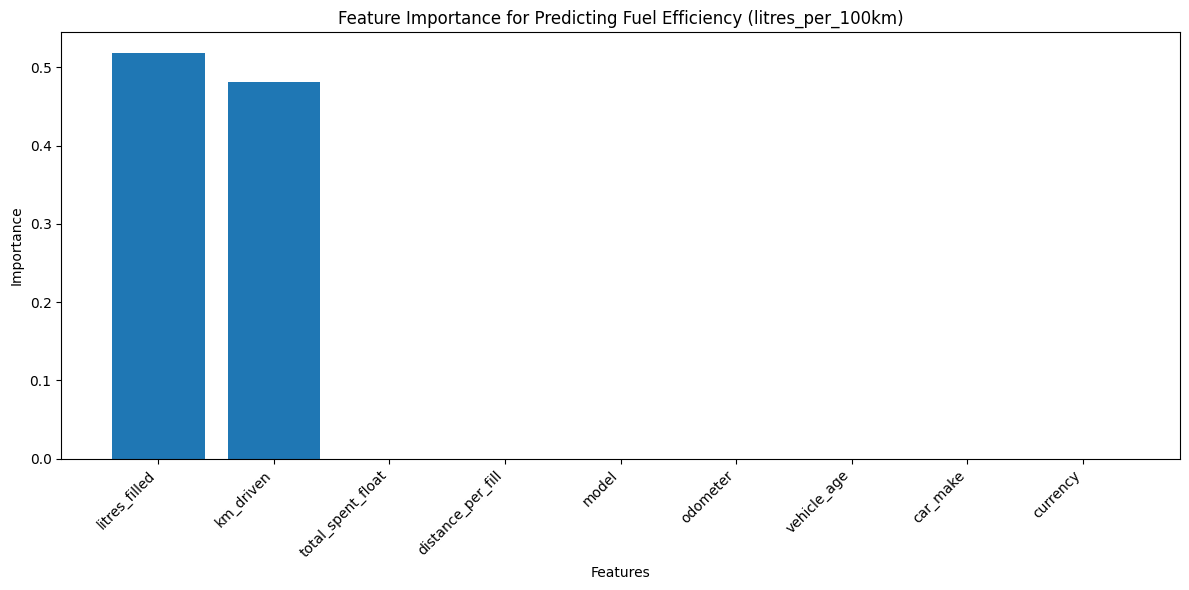

             feature  importance
4      litres_filled    0.518710
5          km_driven    0.481235
3  total_spent_float    0.000010
1  distance_per_fill    0.000010
7              model    0.000009
2           odometer    0.000009
0        vehicle_age    0.000008
6           car_make    0.000007
8           currency    0.000002

Difference in importance between adjacent features:
             feature  importance  importance_diff
4      litres_filled    0.518710              NaN
5          km_driven    0.481235     3.747512e-02
3  total_spent_float    0.000010     4.812247e-01
1  distance_per_fill    0.000010     6.744149e-07
7              model    0.000009     4.243149e-07
2           odometer    0.000009     1.956823e-07
0        vehicle_age    0.000008     1.460121e-06
6           car_make    0.000007     7.007208e-07
8           currency    0.000002     5.373352e-06


In [37]:
#4.2.9
# Random forest of most important variables
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

features = ['vehicle_age', 'distance_per_fill', 'odometer', 'total_spent_float', 
            'litres_filled', 'km_driven', 'car_make', 'model', 'currency']

df_model = df[features + ['litres_per_100km']].copy()

le = LabelEncoder()
for col in ['car_make', 'model', 'currency']:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

X = df_model[features]
y = df_model['litres_per_100km']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'feature': features, 'importance': importances})
feature_imp = feature_imp.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_imp['feature'], feature_imp['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance for Predicting Fuel Efficiency (litres_per_100km)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print(feature_imp)

feature_imp['importance_diff'] = feature_imp['importance'].diff().abs()
print("\nDifference in importance between adjacent features:")
print(feature_imp[['feature', 'importance', 'importance_diff']])


## 4.3 ##


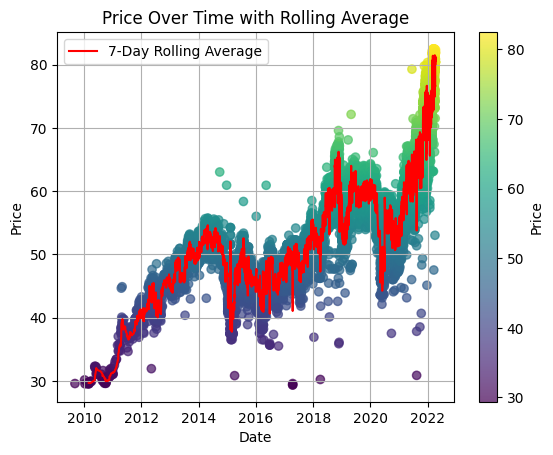

In [38]:
# 4.3.1 & 4.3.2 
# Filter on south african drivers and plotting fuel prices
import matplotlib.pyplot as plt
import pandas as pd


# Filter for South African drivers
sa_drivers_df = df.loc[df['currency'] == 'R'] 
sa_drivers_df = sa_drivers_df.sort_values('date_fueled')


window_size = 7
sa_drivers_df['rolling_avg'] = sa_drivers_df['cost_per_gallon_float'].rolling(window=window_size).mean()


norm = plt.Normalize(sa_drivers_df['cost_per_gallon_float'].min(), sa_drivers_df['cost_per_gallon_float'].max())
cmap = plt.get_cmap('viridis')  

plt.scatter(sa_drivers_df['date_fueled'], sa_drivers_df['cost_per_gallon_float'], 
            c=sa_drivers_df['cost_per_gallon_float'], cmap=cmap, norm=norm, marker='o', alpha=0.7)

plt.plot(sa_drivers_df['date_fueled'], sa_drivers_df['rolling_avg'], color='red', label=f'{window_size}-Day Rolling Average')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time with Rolling Average')
plt.colorbar(label='Price')  # Add a colorbar to show the price scale
plt.grid(True)
plt.legend()
plt.show()


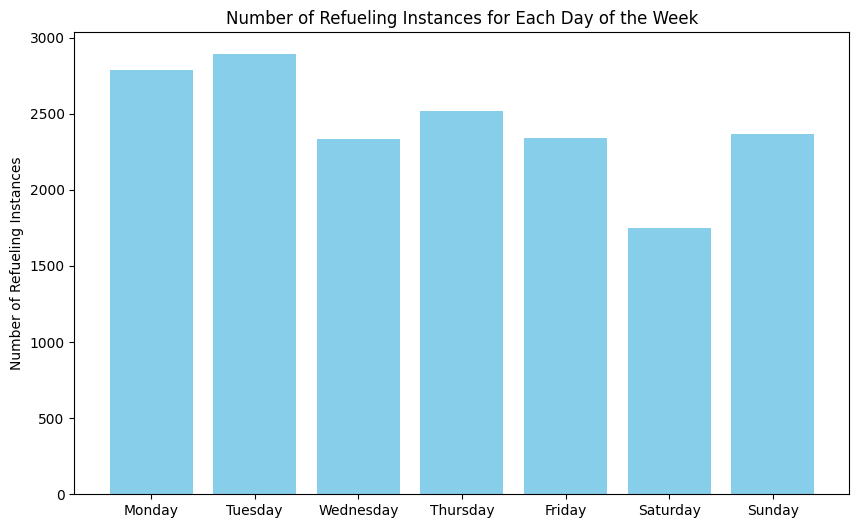

In [39]:
# 4.3.3. Using a suitable plot, show if the difference in the number of people refueling on a Tuesday vs other days. [3]
# Using a bar graph, 2 bars mean of tuesdays other bar, mean of all other days
# Calculate the number of entries (rows) for each day of the week

sa_drivers_df['day_of_week'] = sa_drivers_df['date_captured'].dt.dayofweek
day_counts = sa_drivers_df['day_of_week'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], day_counts, color='skyblue')
plt.ylabel('Number of Refueling Instances')
plt.title('Number of Refueling Instances for Each Day of the Week')
plt.show()

In [40]:
# 4.3.4. Now reduce your dataset to only the entries on the 1st Tuesday and 1st Wednesday in SA every month. [2]
print(sa_drivers_df[sa_drivers_df['day_of_week'] == 1].shape[0])
print(sa_drivers_df[sa_drivers_df['day_of_week'] == 2].shape[0])

def get_1st_tuesday_wednesday(df):
    result = []
    for month, group in df.groupby(df['date_fueled'].dt.to_period('M')):
        first_tuesday = group[(group['day_of_week'] == 1) & (group['date_fueled'].dt.day <= 7)]
        first_wednesday = group[(group['day_of_week'] == 2) & (group['date_fueled'].dt.day <= 7)]
        result.append(first_tuesday)
        result.append(first_wednesday)
    return pd.concat(result)

tues_weds_df = get_1st_tuesday_wednesday(sa_drivers_df)



print(tues_weds_df.head(5))


2890
2336
       date_fueled date_captured  odometer  gallons   mpg     miles  \
137057  2010-03-01    2010-04-27   61651.0   13.312  23.0  306.1760   
247705  2010-06-02    2010-12-28   97399.0   12.815  26.3  337.0345   
137060  2010-10-03    2010-10-13   63487.0   12.481  31.1  388.1591   
401632  2011-01-03    2011-07-26   26183.0   15.930  17.9  285.1470   
292572  2011-01-03    2011-03-15   57610.0   15.959  19.9  317.5841   

                                                 user_url currency  \
137057  https://www.somewebsite.com/volkswagen/fox/199...        R   
247705     https://www.somewebsite.com/audi/a3/2002/56121        R   
137060  https://www.somewebsite.com/volkswagen/fox/199...        R   
401632    https://www.somewebsite.com/bmw/330i/2009/81862        R   
292572  https://www.somewebsite.com/nissan/navara/2006...        R   

        total_spent_float  cost_per_gallon_float  ... litres_filled  \
137057             393.56                  29.56  ...     60.517550   


In [41]:
# 4.3.5. For each Tuesday and Wednesday, add an indicator for whether the price goes up or the price goes down that month
# So we make a new column

monthly_price_change = tues_weds_df.groupby(tues_weds_df['date_fueled'].dt.to_period('M'))['cost_per_gallon_float'].last().diff()

def price_change_indicator(date, price_changes):
    month = date.to_period('M')
    if month in price_changes.index:
        change = price_changes[month]
        return 'Up' if change > 0 else 'Down' if change < 0 else 'No Change'
    return 'Unknown'

# Apply the function to create the indicator column
tues_weds_df['price_change'] = tues_weds_df['date_fueled'].apply(lambda x: price_change_indicator(x, monthly_price_change))



In [42]:
# 4.3.6 & 4.3.7 Comparing fueling days on tues and wednesday

wednesday_counts = tues_weds_df[tues_weds_df['day_of_week'] == 2].groupby('price_change').size()

print("Refuelings on first Wednesdays:")
print(wednesday_counts)

if 'Down' in wednesday_counts and 'Up' in wednesday_counts:
    if wednesday_counts['Down'] > wednesday_counts['Up']:
        print("More people refuel on the first Wednesday when prices go down.")
    else:
        print("More people do not refuel on the first Wednesday when prices go down.")
else:
    print("Not enough data to compare.")
    

tuesday_counts = tues_weds_df[tues_weds_df['day_of_week'] == 1].groupby('price_change').size()

print("\nRefuelings on first Tuesdays:")
print(tuesday_counts)

if 'Up' in tuesday_counts and 'Down' in tuesday_counts:
    if tuesday_counts['Up'] > tuesday_counts['Down']:
        print("More people refuel on the first Tuesday when prices go up.")
    else:
        print("More people do not refuel on the first Tuesday when prices go up.")
else:
    print("Not enough data to compare.")

Refuelings on first Wednesdays:
price_change
Down         252
No Change      8
Up           305
dtype: int64
More people do not refuel on the first Wednesday when prices go down.

Refuelings on first Tuesdays:
price_change
Down         252
No Change     17
Up           605
dtype: int64
More people refuel on the first Tuesday when prices go up.
